In [1]:
#required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style("dark")

In [3]:
loan = pd.read_csv("loan.csv")
loan.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
loan.shape

(39717, 111)

### Now lets check the percentage of null data in the columns

In [5]:
nulls = round(100*(loan.isnull().sum()/len(loan)), 3)
nulls[ nulls > 0 ]

emp_title                       6.191
emp_length                      2.707
desc                           32.581
title                           0.028
mths_since_last_delinq         64.662
                               ...   
tax_liens                       0.098
tot_hi_cred_lim               100.000
total_bal_ex_mort             100.000
total_bc_limit                100.000
total_il_high_credit_limit    100.000
Length: 68, dtype: float64

### We can see that many columns are completely blank. Lets drop these columns first

In [6]:
nulls[nulls == 100]

mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0
bc_util                           100.0


In [7]:
loan.drop(nulls[ nulls == 100 ].index, axis=1, inplace=True)

In [8]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

### So after removing all the completely blank columns we are left with 57 columns

In [9]:
len(loan.columns)

57

### After going through the data dictionary we have identified the following fields to be useful for our analysis among the remaining non blank columns
 loan_amnt
,funded_amnt
,funded_amnt_inv
,annual_inc
,Installment
,term
,int_rate
,emp_length
,dti
,earliest_cr_line
,pub_rec
,pub_rec_bankruptcies
,home_ownership
,loan_status
,purpose
,issue_d
,grade
,sub_grade
,verification_status
,addr_state

### Additionally we can keep the id column as it is an identity column. So we will include that as well in the final dataframe

In [10]:
refined_loan_data = loan[['id'
,'loan_amnt'
,'funded_amnt'
,'funded_amnt_inv'
,'annual_inc'
,'installment'
,'term'
,'int_rate'
,'emp_length'
,'dti'
,'earliest_cr_line'
,'pub_rec'
,'pub_rec_bankruptcies'
,'home_ownership'
,'loan_status'
,'purpose'
,'issue_d'
,'grade'
,'sub_grade'
,'verification_status'
,'addr_state']]

### Performing data cleaning

In [11]:
refined_loan_data.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
annual_inc                 0
installment                0
term                       0
int_rate                   0
emp_length              1075
dti                        0
earliest_cr_line           0
pub_rec                    0
pub_rec_bankruptcies     697
home_ownership             0
loan_status                0
purpose                    0
issue_d                    0
grade                      0
sub_grade                  0
verification_status        0
addr_state                 0
dtype: int64

### Lets remove the null rows for emp_length and pub_rec_bankruptcies as the null percentage is very minimal

In [12]:
refined_loan_data.dropna(subset=['emp_length', 'pub_rec_bankruptcies'], inplace=True)

### Now we don't have any null rows in our final dataset

In [13]:
refined_loan_data.isnull().sum()

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
annual_inc              0
installment             0
term                    0
int_rate                0
emp_length              0
dti                     0
earliest_cr_line        0
pub_rec                 0
pub_rec_bankruptcies    0
home_ownership          0
loan_status             0
purpose                 0
issue_d                 0
grade                   0
sub_grade               0
verification_status     0
addr_state              0
dtype: int64

### Checking if any column contains only single values 

In [14]:
refined_loan_data.nunique(axis=0)==1

id                      False
loan_amnt               False
funded_amnt             False
funded_amnt_inv         False
annual_inc              False
installment             False
term                    False
int_rate                False
emp_length              False
dti                     False
earliest_cr_line        False
pub_rec                 False
pub_rec_bankruptcies    False
home_ownership          False
loan_status             False
purpose                 False
issue_d                 False
grade                   False
sub_grade               False
verification_status     False
addr_state              False
dtype: bool

### Lets look at the unique values of loan status

In [15]:
refined_loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

### We are only interested in people who either paid or defaulted. So lets remove 'Current' status rows

In [16]:
refined_loan_data = refined_loan_data[refined_loan_data['loan_status'] != 'Current']

### Lets take a look at our refined dataset now

In [17]:
pd.set_option('display.max_columns', 25)

In [18]:
refined_loan_data.head(10)

id  loan_amnt  funded_amnt  funded_amnt_inv  annual_inc  installment  \
0   1077501       5000         5000           4975.0     24000.0       162.87   
1   1077430       2500         2500           2500.0     30000.0        59.83   
2   1077175       2400         2400           2400.0     12252.0        84.33   
3   1076863      10000        10000          10000.0     49200.0       339.31   
5   1075269       5000         5000           5000.0     36000.0       156.46   
6   1069639       7000         7000           7000.0     47004.0       170.08   
7   1072053       3000         3000           3000.0     48000.0       109.43   
8   1071795       5600         5600           5600.0     40000.0       152.39   
9   1071570       5375         5375           5350.0     15000.0       121.45   
10  1070078       6500         6500           6500.0     72000.0       153.45   

          term int_rate emp_length    dti earliest_cr_line  pub_rec  \
0    36 months   10.65%  10+ years  27.65           Jan-85        0   
1    60 months   15.27%   < 1 year   1.00           Apr-99        0   
2    36 months   15.96%  10+ years   8.72           Nov-01        0   
3    36 months   13.49%  10+ years  20.00           Feb-96        0   
5    36 months    7.90%    3 years  11.20           Nov-04        0   
6    60 months   15.96%    8 years  23.51           Jul-05        0   
7    36 months   18.64%    9 years   5.35           Jan-07        0   
8    60 months   21.28%    4 years   5.55           Apr-04        0   
9    60 months   12.69%   < 1 year  18.08           Sep-04        0   
10   60 months   14.65%    5 years  16.12           Jan-98        0   

    pub_rec_bankruptcies home_ownership  loan_status             purpose  \
0                    0.0           RENT   Fully Paid         credit_card   
1                    0.0           RENT  Charged Off                 car   
2                    0.0           RENT   Fully Paid      small_business   
3                    0.0           RENT   Fully Paid               other   
5                    0.0           RENT   Fully Paid             wedding   
6                    0.0           RENT   Fully Paid  debt_consolidation   
7                    0.0           RENT   Fully Paid                 car   
8                    0.0            OWN  Charged Off      small_business   
9                    0.0           RENT  Charged Off               other   
10                   0.0            OWN   Fully Paid  debt_consolidation   

   issue_d grade sub_grade verification_status addr_state  
0   Dec-11     B        B2            Verified         AZ  
1   Dec-11     C        C4     Source Verified         GA  
2   Dec-11     C        C5        Not Verified         IL  
3   Dec-11     C        C1     Source Verified         CA  
5   Dec-11     A        A4     Source Verified         AZ  
6   Dec-11     C        C5        Not Verified         NC  
7   Dec-11     E        E1     Source Verified         CA  
8   Dec-11     F        F2     Source Verified         CA  
9   Dec-11     B        B5            Verified         TX  
10  Dec-11     C        C3        Not Verified         AZ

### Checking datatypes

In [19]:
refined_loan_data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
annual_inc              float64
installment             float64
term                     object
int_rate                 object
emp_length               object
dti                     float64
earliest_cr_line         object
pub_rec                   int64
pub_rec_bankruptcies    float64
home_ownership           object
loan_status              object
purpose                  object
issue_d                  object
grade                    object
sub_grade                object
verification_status      object
addr_state               object
dtype: object

### Checking unique values in different columns

In [20]:
refined_loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [21]:
refined_loan_data['pub_rec_bankruptcies'].unique()

array([0., 1., 2.])

### Removing the white space from 'term'

In [22]:
refined_loan_data['term'] = [term[1:] for term in refined_loan_data['term']]
refined_loan_data['term'].unique()

array(['36 months', '60 months'], dtype=object)

### pub_rec_bankruptcies should be int as by definition its no of records

In [23]:
refined_loan_data['pub_rec_bankruptcies'] = refined_loan_data['pub_rec_bankruptcies'].astype(int)
refined_loan_data['pub_rec_bankruptcies'].unique()

array([0, 1, 2])

### 'int_rate' should be float, so we need to remove % symbol

In [24]:
refined_loan_data['int_rate'] =[float(rate.replace('%','')) for rate in refined_loan_data['int_rate']]

In [25]:
refined_loan_data['int_rate'].head(5)

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

### Lets split issue_d, earliest_cr_line into month and year

In [26]:
refined_loan_data['issue_d'].head(5)

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [27]:
refined_loan_data['issue_d_month'] = [date[:date.find('-')] for date in refined_loan_data['issue_d']]

In [28]:
refined_loan_data['issue_d_month'].unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

In [29]:
refined_loan_data['issue_d_year'] = ['20'+date[date.find('-')+1:] for date in refined_loan_data['issue_d']]
refined_loan_data['issue_d_year'].unique()

array(['2011', '2010', '2009', '2008', '2007'], dtype=object)

In [30]:
refined_loan_data['earliest_cr_line'].head(5)

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
5    Nov-04
Name: earliest_cr_line, dtype: object

In [31]:
refined_loan_data['earliest_cr_line_month'] = [date[:date.find('-')] for date in refined_loan_data['earliest_cr_line']]
refined_loan_data['earliest_cr_line_month'].unique()

array(['Jan', 'Apr', 'Nov', 'Feb', 'Jul', 'Sep', 'Oct', 'May', 'Aug',
       'Jun', 'Dec', 'Mar'], dtype=object)

### calculating earliest_cr_line_year: if last 2 numbers are greater than 25 it means they are past year. So we append them with 19, else append with 20

In [32]:
def findYear(date):
    year = date[date.find('-')+1:]
    if int(year) > 25:
        return '19'+ year
    else:
        return '20'+ year
refined_loan_data['earliest_cr_line_year'] = refined_loan_data['earliest_cr_line'].apply(findYear)
refined_loan_data['earliest_cr_line_year'].unique()

array(['1985', '1999', '2001', '1996', '2004', '2005', '2007', '1998',
       '1989', '2003', '1991', '1993', '1997', '1983', '2002', '1984',
       '2006', '1987', '1981', '2000', '1994', '1995', '1992', '1986',
       '1990', '1988', '1980', '2008', '1979', '1978', '1971', '1972',
       '1970', '1969', '1975', '1976', '1977', '1982', '1968', '1974',
       '1967', '1965', '1973', '1963', '1966', '1962', '1956', '1946',
       '1950', '1964', '1954'], dtype=object)

### Lets create a column 'perc_loan_diff' which shows the perc difference of loan-amount and funded amount

In [33]:
refined_loan_data['perc_loan_diff'] = round((refined_loan_data['funded_amnt_inv']-refined_loan_data['loan_amnt'])*100/refined_loan_data['loan_amnt'],2)

### Now the data is ready for us to perform the analysis

In [34]:
refined_loan_data.head(10)

id  loan_amnt  funded_amnt  funded_amnt_inv  annual_inc  installment  \
0   1077501       5000         5000           4975.0     24000.0       162.87   
1   1077430       2500         2500           2500.0     30000.0        59.83   
2   1077175       2400         2400           2400.0     12252.0        84.33   
3   1076863      10000        10000          10000.0     49200.0       339.31   
5   1075269       5000         5000           5000.0     36000.0       156.46   
6   1069639       7000         7000           7000.0     47004.0       170.08   
7   1072053       3000         3000           3000.0     48000.0       109.43   
8   1071795       5600         5600           5600.0     40000.0       152.39   
9   1071570       5375         5375           5350.0     15000.0       121.45   
10  1070078       6500         6500           6500.0     72000.0       153.45   

         term  int_rate emp_length    dti earliest_cr_line  pub_rec  ...  \
0   36 months     10.65  10+ years  27.65           Jan-85        0  ...   
1   60 months     15.27   < 1 year   1.00           Apr-99        0  ...   
2   36 months     15.96  10+ years   8.72           Nov-01        0  ...   
3   36 months     13.49  10+ years  20.00           Feb-96        0  ...   
5   36 months      7.90    3 years  11.20           Nov-04        0  ...   
6   60 months     15.96    8 years  23.51           Jul-05        0  ...   
7   36 months     18.64    9 years   5.35           Jan-07        0  ...   
8   60 months     21.28    4 years   5.55           Apr-04        0  ...   
9   60 months     12.69   < 1 year  18.08           Sep-04        0  ...   
10  60 months     14.65    5 years  16.12           Jan-98        0  ...   

    loan_status             purpose issue_d grade sub_grade  \
0    Fully Paid         credit_card  Dec-11     B        B2   
1   Charged Off                 car  Dec-11     C        C4   
2    Fully Paid      small_business  Dec-11     C        C5   
3    Fully Paid               other  Dec-11     C        C1   
5    Fully Paid             wedding  Dec-11     A        A4   
6    Fully Paid  debt_consolidation  Dec-11     C        C5   
7    Fully Paid                 car  Dec-11     E        E1   
8   Charged Off      small_business  Dec-11     F        F2   
9   Charged Off               other  Dec-11     B        B5   
10   Fully Paid  debt_consolidation  Dec-11     C        C3   

   verification_status addr_state issue_d_month issue_d_year  \
0             Verified         AZ           Dec         2011   
1      Source Verified         GA           Dec         2011   
2         Not Verified         IL           Dec         2011   
3      Source Verified         CA           Dec         2011   
5      Source Verified         AZ           Dec         2011   
6         Not Verified         NC           Dec         2011   
7      Source Verified         CA           Dec         2011   
8      Source Verified         CA           Dec         2011   
9             Verified         TX           Dec         2011   
10        Not Verified         AZ           Dec         2011   

   earliest_cr_line_month earliest_cr_line_year perc_loan_diff  
0                     Jan                  1985          -0.50  
1                     Apr                  1999           0.00  
2                     Nov                  2001           0.00  
3                     Feb                  1996           0.00  
5                     Nov                  2004           0.00  
6                     Jul                  2005           0.00  
7                     Jan                  2007           0.00  
8                     Apr                  2004           0.00  
9                     Sep                  2004          -0.47  
10                    Jan                  1998           0.00  

[10 rows x 26 columns]

## Data Analysis (UniVariate)

## loan_amnt

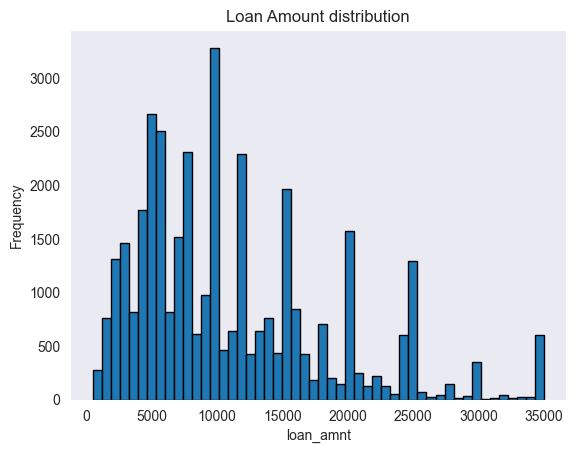

In [35]:
refined_loan_data['loan_amnt'].plot.hist(bins=50,edgecolor='black')
plt.title('Loan Amount distribution')
plt.xlabel('loan_amnt')
plt.show()

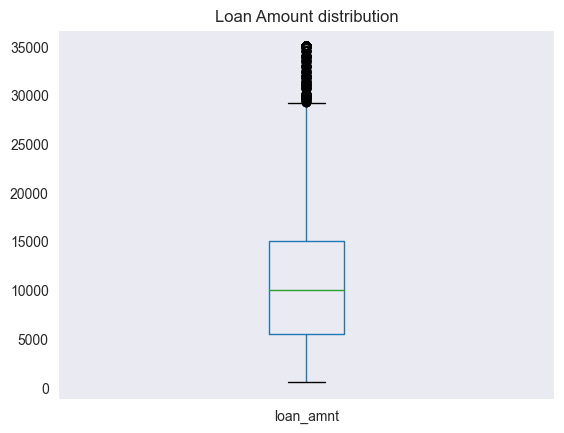

In [36]:
plt.title('Loan Amount distribution')
refined_loan_data.boxplot(column =['loan_amnt'], grid = False)
plt.show()

### Observations
Many people took a loan of 10,000 and median distribution is also 10,000

## funded_amnt

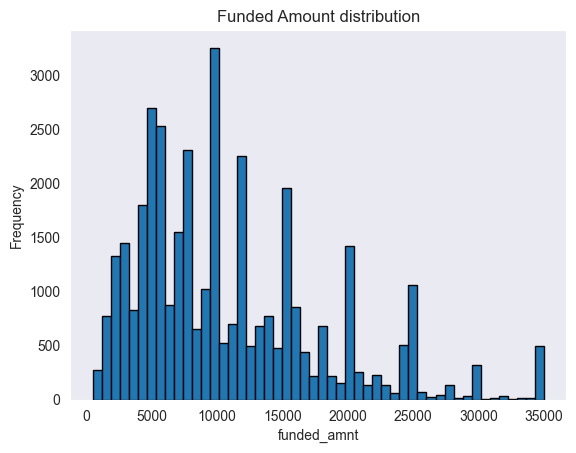

In [37]:
refined_loan_data['funded_amnt'].plot.hist(bins=50,edgecolor='black')
plt.title('Funded Amount distribution')
plt.xlabel('funded_amnt')
plt.show()

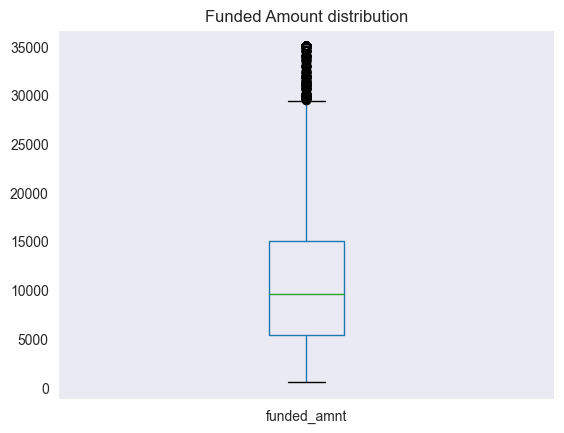

In [38]:
plt.title('Funded Amount distribution')
refined_loan_data.boxplot(column =['funded_amnt'], grid = False)
plt.show()

## funded_amnt_inv

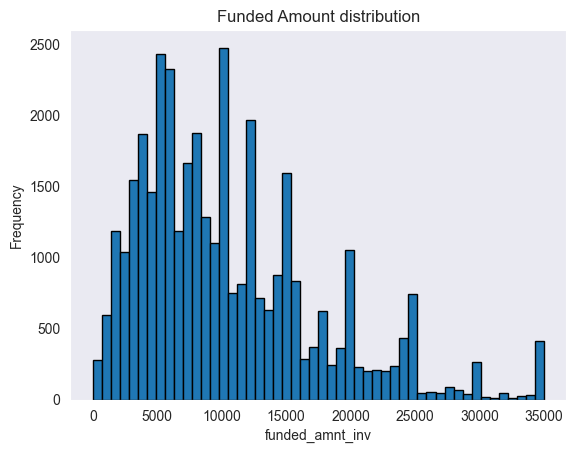

In [39]:
refined_loan_data['funded_amnt_inv'].plot.hist(bins=50,edgecolor='black')
plt.title('Funded Amount distribution')
plt.xlabel('funded_amnt_inv')
plt.show()

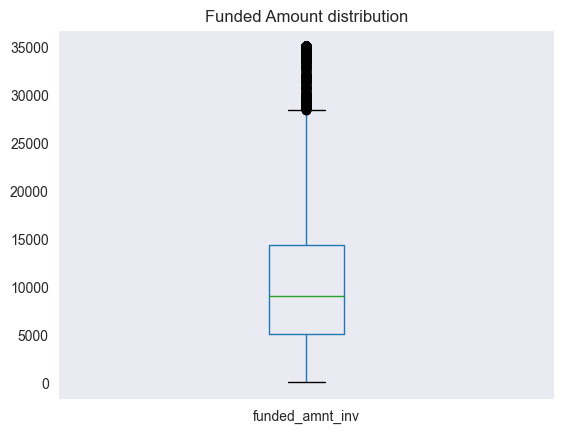

In [40]:
plt.title('Funded Amount distribution')
refined_loan_data.boxplot(column =['funded_amnt_inv'], grid = False)
plt.show()

### Observations
loan_amnt, funded_amnt and funded_amnt_inv have same behaviour

## perc_loan_diff

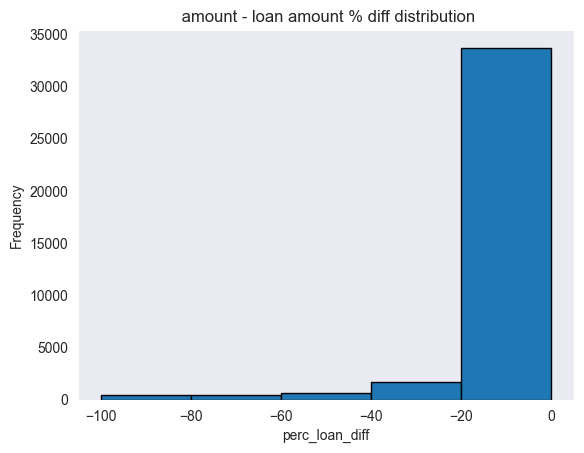

In [41]:
refined_loan_data['perc_loan_diff'].plot.hist(bins=5,edgecolor='black')
plt.title(' amount - loan amount % diff distribution')
plt.xlabel('perc_loan_diff')
plt.show()

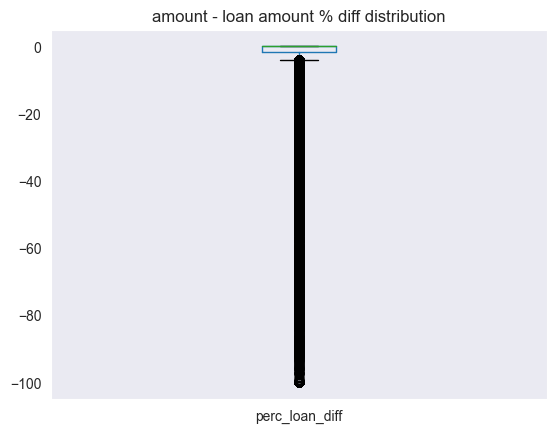

In [42]:
plt.title('amount - loan amount % diff distribution')
refined_loan_data.boxplot(column =['perc_loan_diff'], grid = False)
plt.show()

### Observations
Around 75% of the people got complete requested loan amount

## annual_inc

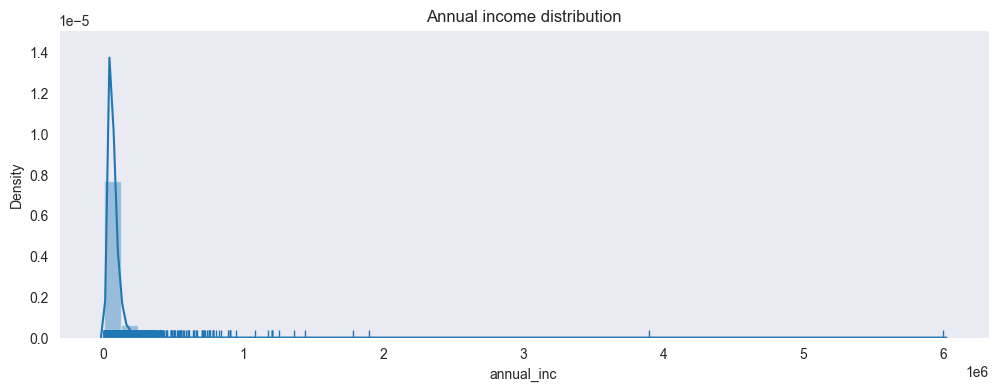

In [43]:
plt.figure(figsize=(12,4))
sns.distplot(refined_loan_data['annual_inc'], rug=True)
plt.title('Annual income distribution')
plt.xlabel('annual_inc')
plt.show()

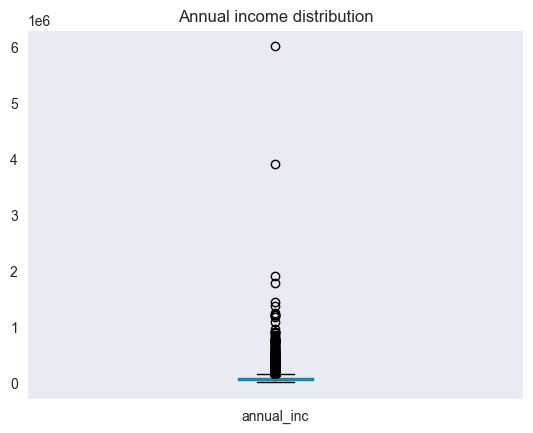

In [44]:
plt.title('Annual income distribution')
refined_loan_data.boxplot(column =['annual_inc'], grid = False)
plt.show()

### Observations:
Around 99% People have an annual income less than 2000000

## installment

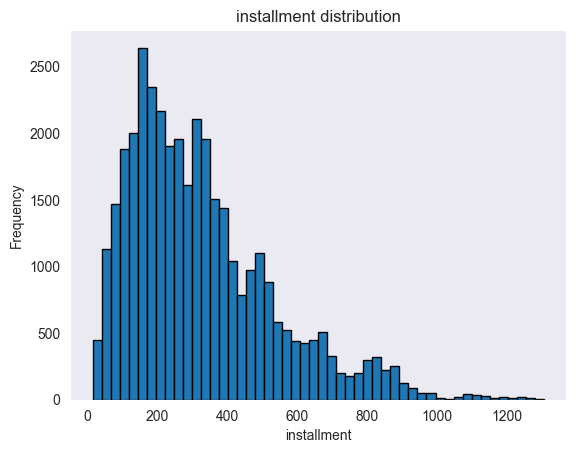

In [45]:
refined_loan_data['installment'].plot.hist(bins=50,edgecolor='black')
plt.title('installment distribution')
plt.xlabel('installment')
plt.show()

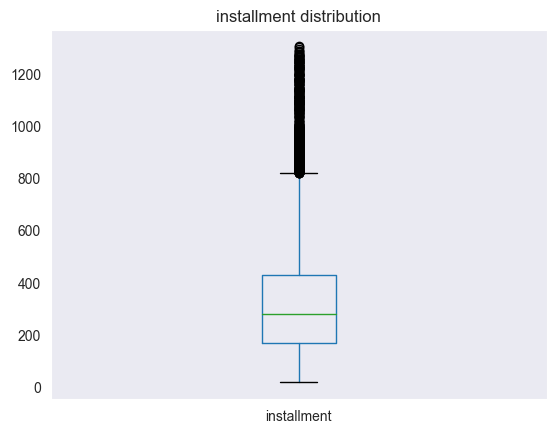

In [46]:
plt.title('installment distribution')
refined_loan_data.boxplot(column =['installment'], grid = False)
plt.show()

### Observations:
Median distribution is around 260 and very few installments in range of 1000 and 1200

## term

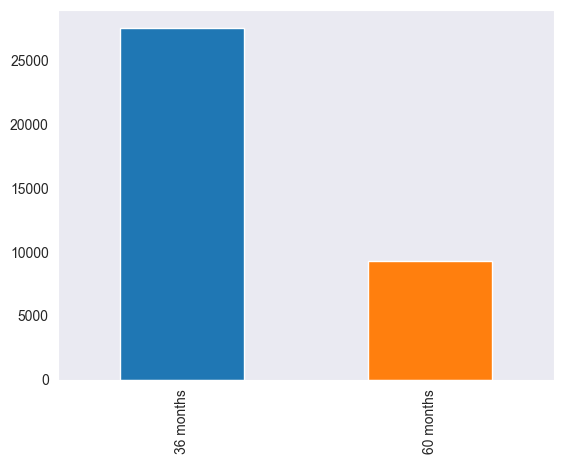

In [47]:
temp_df = refined_loan_data['term'].value_counts()
temp_df.plot.bar(color=['C0', 'C1'])
plt.show()

### Observations
More people took loans for 36 months than 60 months tenure

## int_rate

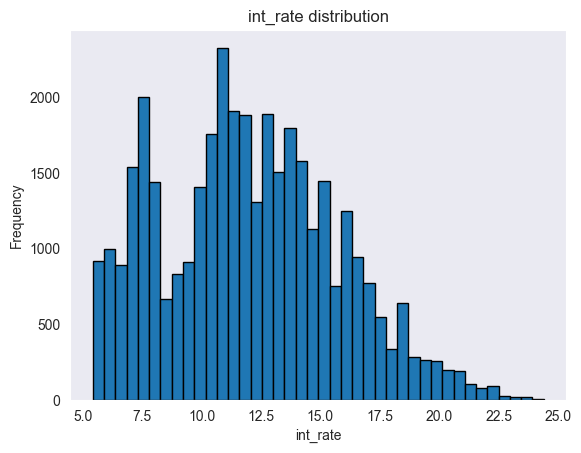

In [48]:
refined_loan_data['int_rate'].plot.hist(bins=40,edgecolor='black')
plt.title('int_rate distribution')
plt.xlabel('int_rate')
plt.show()

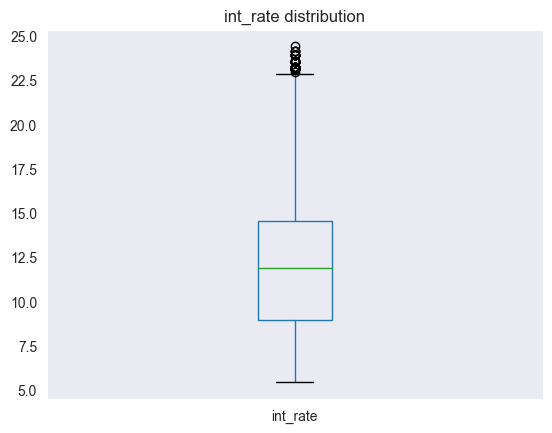

In [49]:
plt.title('int_rate distribution')
refined_loan_data.boxplot(column =['int_rate'], grid = False)
plt.show()

### Observations
Most of the interest rates lie between 9% to 14.7%. Very few people also took loan at higher rates between 22.5 and 25%

## emp_length

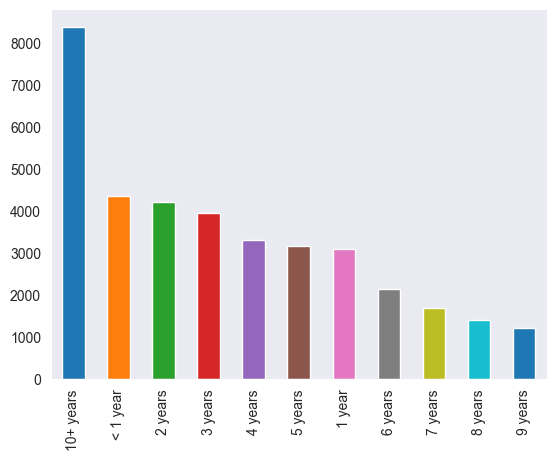

In [50]:
temp_df = refined_loan_data['emp_length'].value_counts()
temp_df.plot.bar(color=['C'+ str(i) for i in range(10)])
plt.show()

### Observations
Most of the borrowers are having 10+ years of work experience

## dti

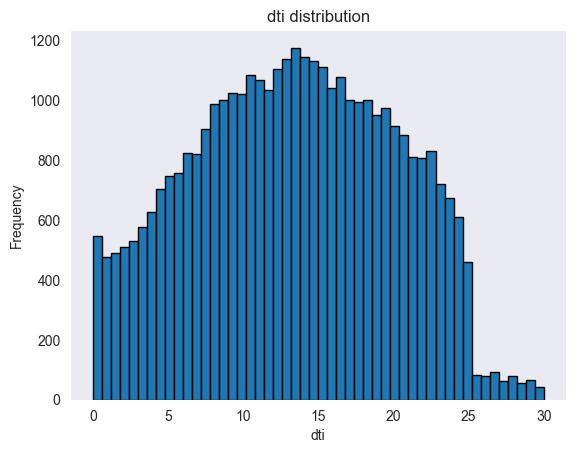

In [51]:
refined_loan_data['dti'].plot.hist(bins=50,edgecolor='black')
plt.title('dti distribution')
plt.xlabel('dti')
plt.show()

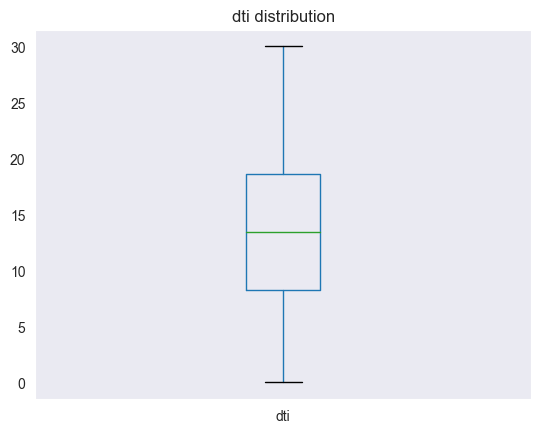

In [52]:
plt.title('dti distribution')
refined_loan_data.boxplot(column =['dti'], grid = False)
plt.show()

### Observations
The median distribution of dti is 12.5 and people with dti less than 30 got the loans

## pub_rec

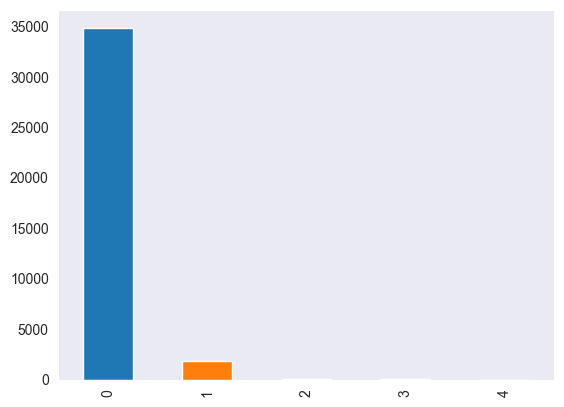

In [53]:
temp_df = refined_loan_data['pub_rec'].value_counts()
temp_df.plot.bar(color=['C'+ str(i) for i in range(2)])
plt.show()

### Observations
Around 95% borrowers have no public records

## pub_rec_bankruptcies

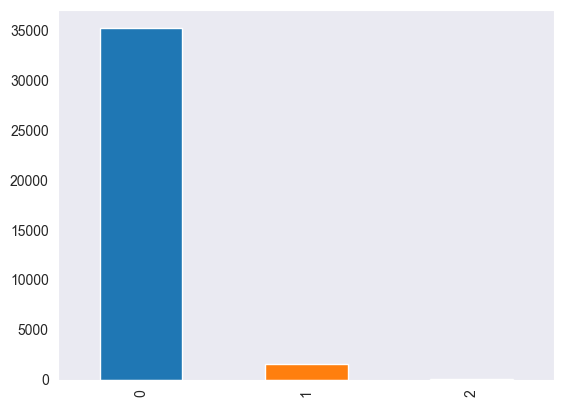

In [54]:
temp_df = refined_loan_data['pub_rec_bankruptcies'].value_counts()
temp_df.plot.bar(color=['C'+ str(i) for i in range(2)])
plt.show()

### Observations 
Around 95% borrowers have no public records of bankruptcies

## purpose

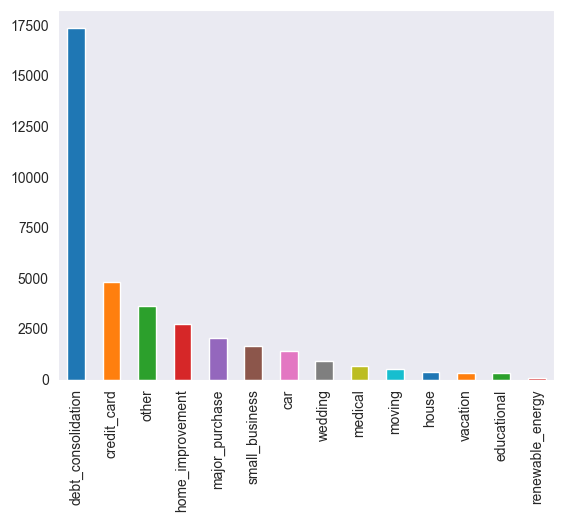

In [55]:
temp_df = refined_loan_data['purpose'].value_counts()
temp_df.plot.bar(color=['C'+ str(i) for i in range(len(refined_loan_data['purpose'].unique()))])
plt.show()

### Observations
Most of the people take loan for debt consolidation purpose and least for renewable energy

## grade

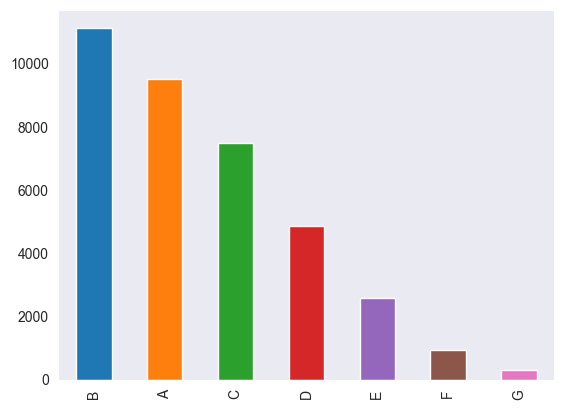

In [56]:
temp_df = refined_loan_data['grade'].value_counts()
temp_df.plot.bar(color=['C'+ str(i) for i in range(len(refined_loan_data['grade'].unique()))])
plt.show()

### Observations
Most of the loans are of type B and very few are type G

## sub_grade

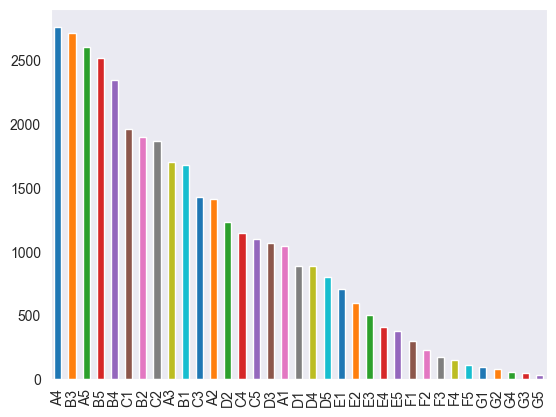

In [57]:
temp_df = refined_loan_data['sub_grade'].value_counts()
temp_df.plot.bar(color=['C'+ str(i) for i in range(len(refined_loan_data['sub_grade'].unique()))])
plt.show()

### Observations
A4, B3, C1, D2, E1, F1, G1 are the majority of loans in their respective grades

## verification_status 

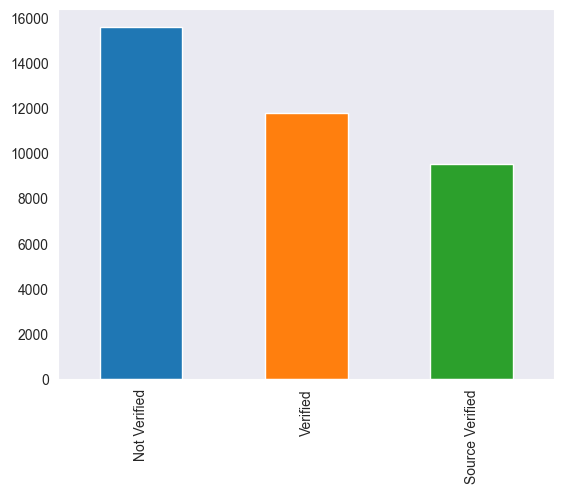

In [58]:
temp_df = refined_loan_data['verification_status'].value_counts()
temp_df.plot.bar(color=['C'+ str(i) for i in range(len(refined_loan_data['verification_status'].unique()))])
plt.show()

### Observations 
Most (~ 42%) of the borrowers were not verified by the lender

## addr_state

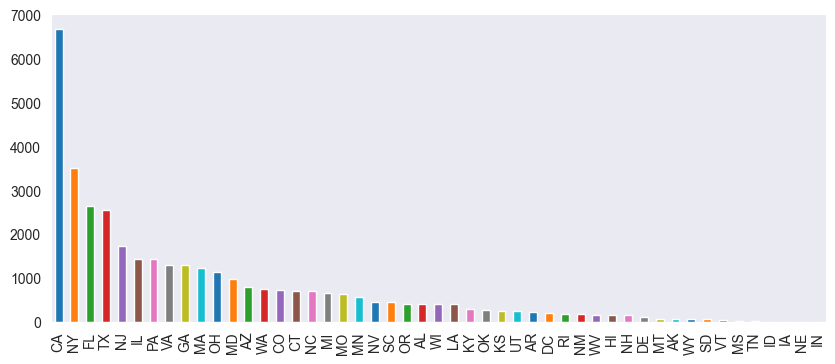

In [59]:
plt.figure(figsize=(10,4))
temp_df = refined_loan_data['addr_state'].value_counts()
temp_df.plot.bar(color=['C'+ str(i) for i in range(len(refined_loan_data['addr_state'].unique()))])
plt.show()

### Observations 
Most of the borrowers are from CA, NY

## loan_status

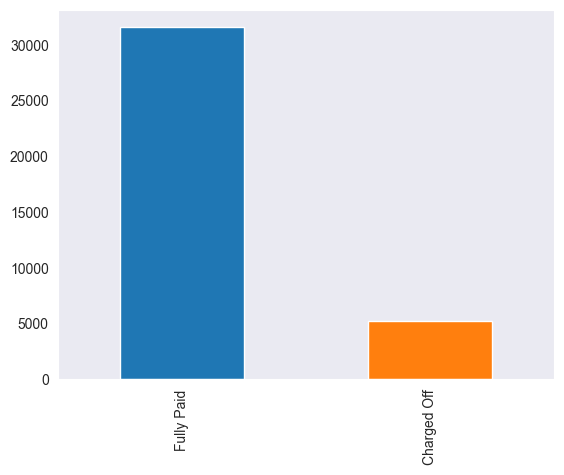

In [60]:
#plt.figure(figsize=(10,4))
temp_df = refined_loan_data['loan_status'].value_counts()
temp_df.plot.bar(color=['C'+ str(i) for i in range(len(refined_loan_data['loan_status'].unique()))])
plt.show()

### Observations
Most of the borrowers fully paid their loans

## issue_d_year

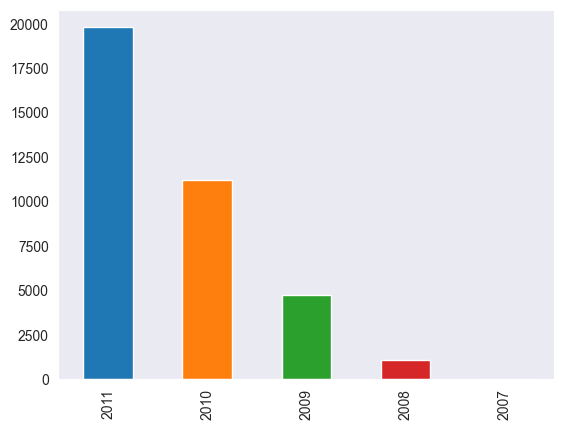

In [61]:
temp_df = refined_loan_data['issue_d_year'].value_counts()
temp_df.plot.bar(color=['C'+ str(i) for i in range(len(refined_loan_data['issue_d_year'].unique()))])
plt.show()

### Observations
The loans issued are increasing year by years

## issue_d_month

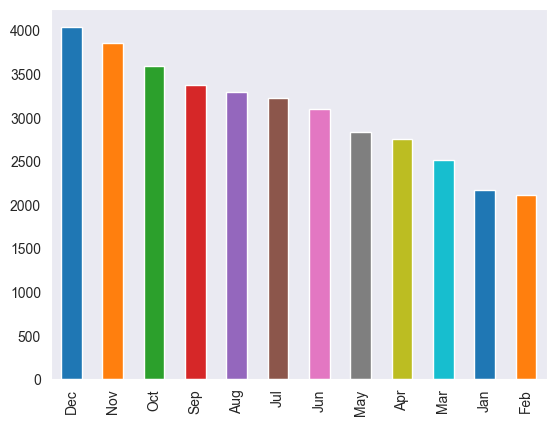

In [62]:
temp_df = refined_loan_data['issue_d_month'].value_counts()
temp_df.plot.bar(color=['C'+ str(i) for i in range(len(refined_loan_data['issue_d_month'].unique()))])
plt.show()

### Observations
Most of the loans are issued on Oct, Nov, Sept

## earliest_cr_line_month 
## earliest_cr_line_year

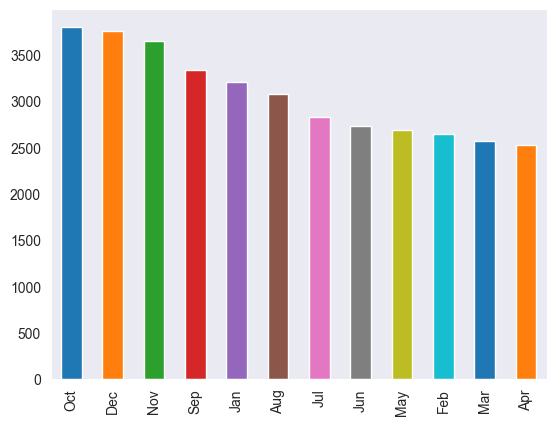

In [63]:
temp_df = refined_loan_data['earliest_cr_line_month'].value_counts()
temp_df.plot.bar(color=['C'+ str(i) for i in range(len(refined_loan_data['earliest_cr_line_month'].unique()))])
plt.show()

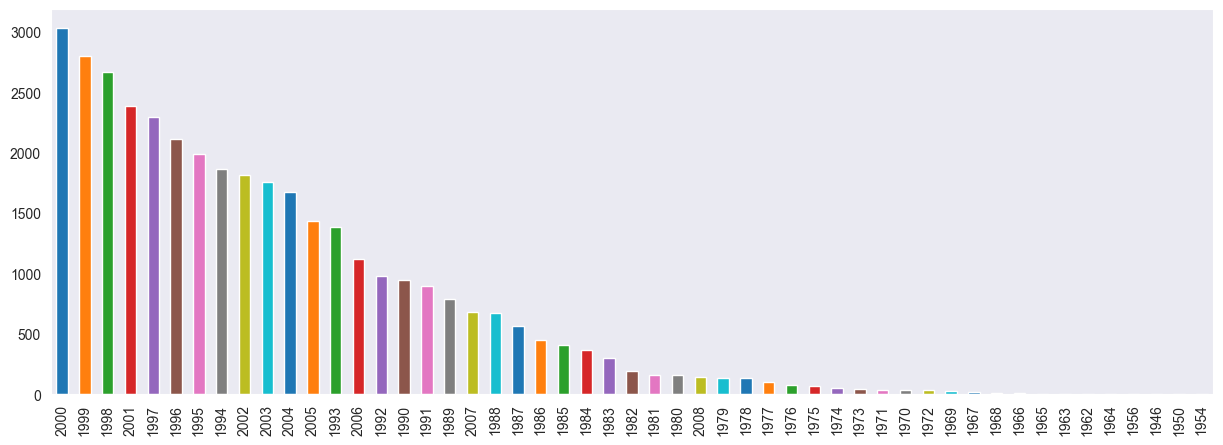

In [64]:
plt.figure(figsize=(15,5))
temp_df = refined_loan_data['earliest_cr_line_year'].value_counts()
temp_df.plot.bar(color=['C'+ str(i) for i in range(len(refined_loan_data['earliest_cr_line_year'].unique()))])
plt.show()

### Observations
Most of the people are got credits on Oct, Nov, Sept and in the year 2000

## Data Analysis (Segmented UniVariate)

## loan_amnt vs other fields

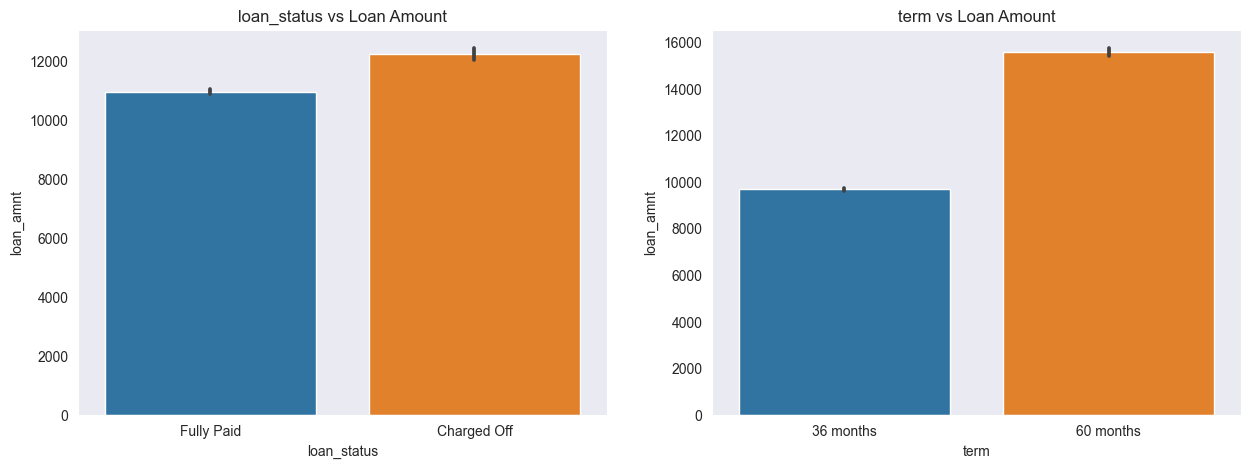

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='loan_status', y=refined_loan_data['loan_amnt'], data=refined_loan_data)
plt.title('loan_status vs Loan Amount')
plt.subplot(122)
sns.barplot(x='term', y=refined_loan_data['loan_amnt'], data=refined_loan_data)
plt.title('term vs Loan Amount')
plt.show()

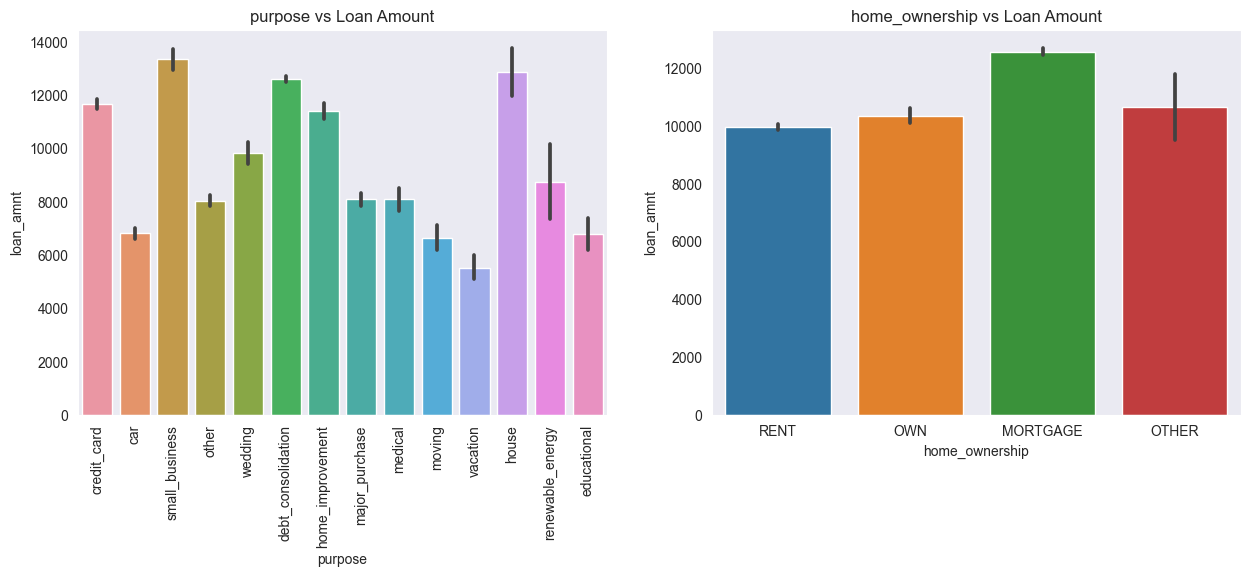

In [66]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='purpose', y=refined_loan_data['loan_amnt'], data=refined_loan_data)
plt.title('purpose vs Loan Amount')
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='home_ownership', y=refined_loan_data['loan_amnt'], data=refined_loan_data)
plt.title('home_ownership vs Loan Amount')
plt.show()

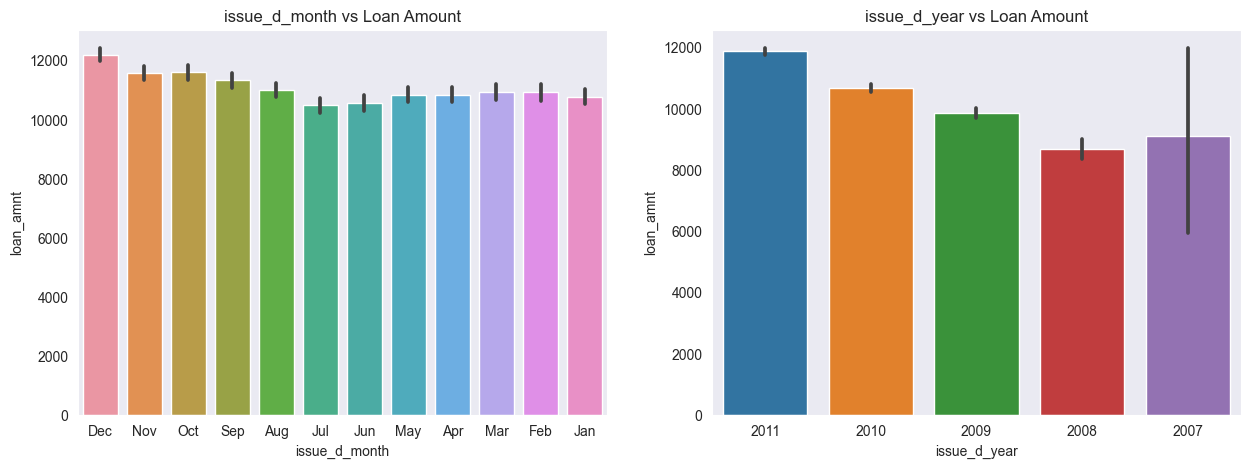

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='issue_d_month', y=refined_loan_data['loan_amnt'], data=refined_loan_data)
plt.title('issue_d_month vs Loan Amount')
plt.subplot(122)
sns.barplot(x='issue_d_year', y=refined_loan_data['loan_amnt'], data=refined_loan_data)
plt.title('issue_d_year vs Loan Amount')
plt.show()

### Observations
1) The higher the loan amount, the higher the default rate
2) Most loans are taken for 60 months tenure
3) More loans are given for small business, house, house improvement and debt_considation 
4) Higher loan amounts are given in Dec,Nov,Oct
5) Higher loan amounts are issued in 2011

## funded_amnt

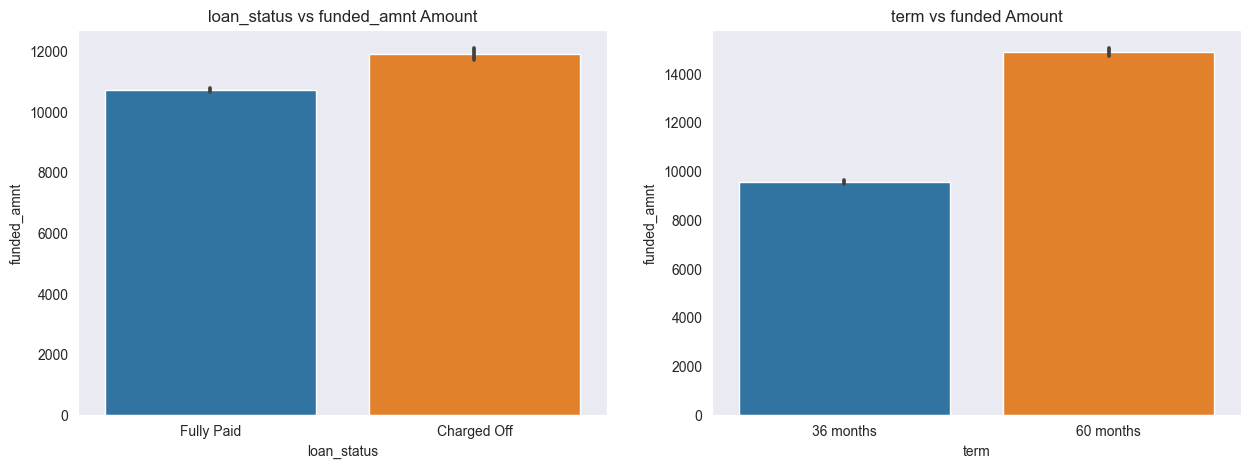

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='loan_status', y=refined_loan_data['funded_amnt'], data=refined_loan_data)
plt.title('loan_status vs funded_amnt Amount')
plt.subplot(122)
sns.barplot(x='term', y=refined_loan_data['funded_amnt'], data=refined_loan_data)
plt.title('term vs funded Amount')
plt.show()

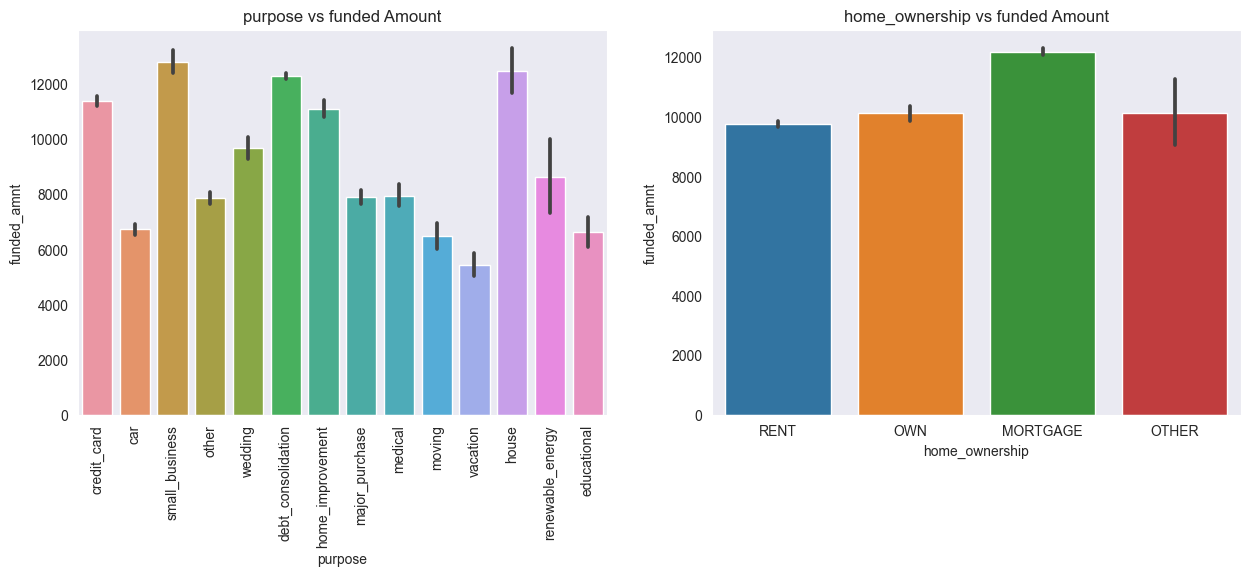

In [69]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='purpose', y=refined_loan_data['funded_amnt'], data=refined_loan_data)
plt.title('purpose vs funded Amount')
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='home_ownership', y=refined_loan_data['funded_amnt'], data=refined_loan_data)
plt.title('home_ownership vs funded Amount')
plt.show()

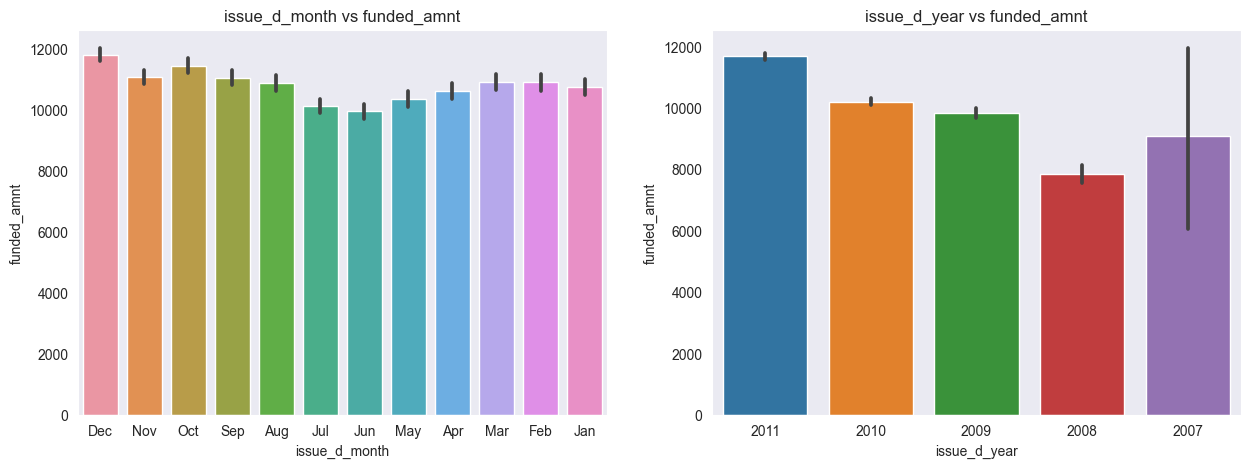

In [70]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='issue_d_month', y=refined_loan_data['funded_amnt'], data=refined_loan_data)
plt.title('issue_d_month vs funded_amnt')
plt.subplot(122)
sns.barplot(x='issue_d_year', y=refined_loan_data['funded_amnt'], data=refined_loan_data)
plt.title('issue_d_year vs funded_amnt')
plt.show()

### Observations
Same pattern as loan amount

## int_rate

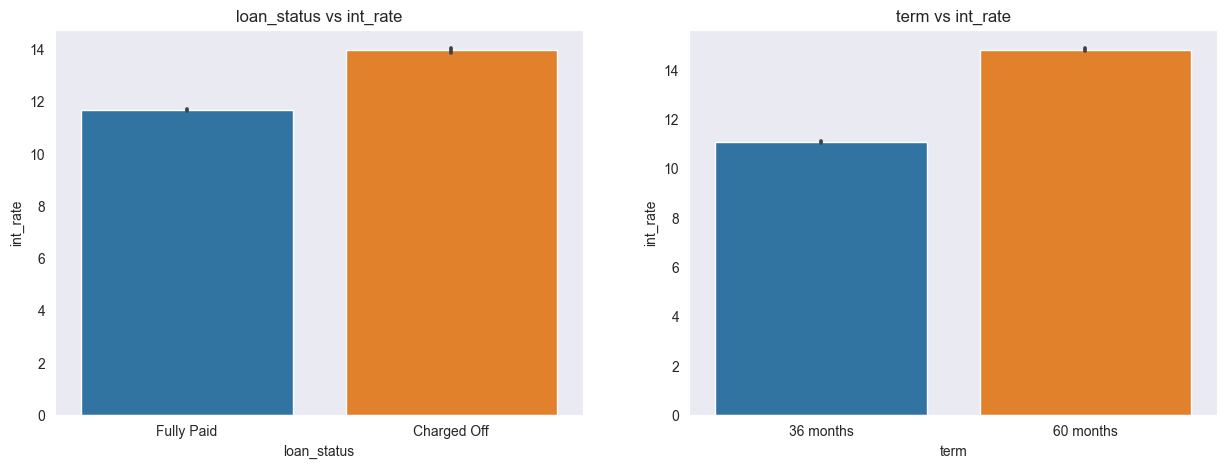

In [71]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='loan_status', y=refined_loan_data['int_rate'], data=refined_loan_data)
plt.title('loan_status vs int_rate')
plt.subplot(122)
sns.barplot(x='term', y=refined_loan_data['int_rate'], data=refined_loan_data)
plt.title('term vs int_rate')
plt.show()

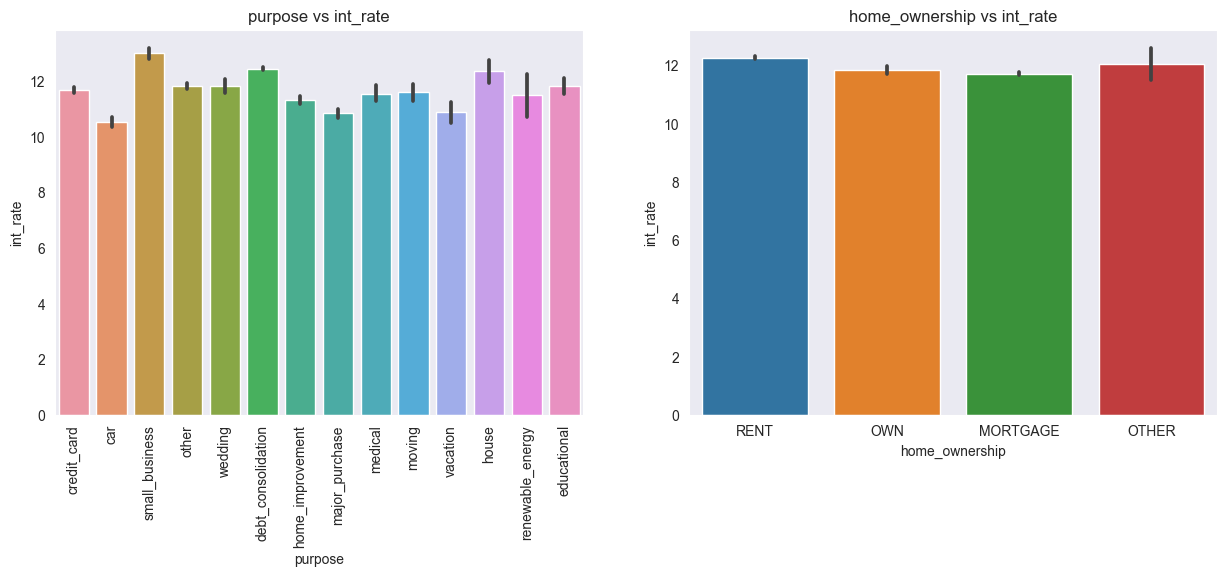

In [72]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='purpose', y=refined_loan_data['int_rate'], data=refined_loan_data)
plt.title('purpose vs int_rate')
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='home_ownership', y=refined_loan_data['int_rate'], data=refined_loan_data)
plt.title('home_ownership vs int_rate')
plt.show()

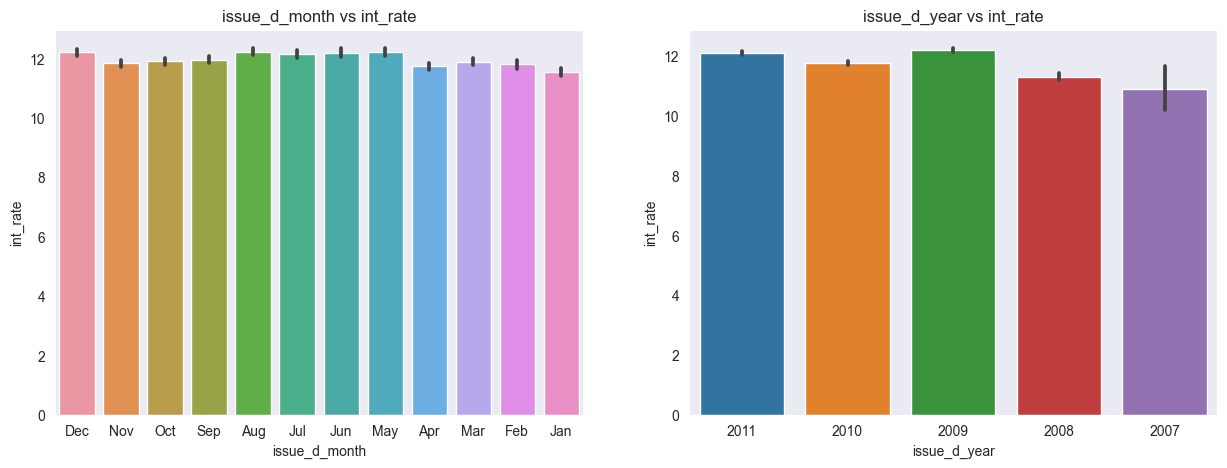

In [73]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='issue_d_month', y=refined_loan_data['int_rate'], data=refined_loan_data)
plt.title('issue_d_month vs int_rate')
plt.subplot(122)
sns.barplot(x='issue_d_year', y=refined_loan_data['int_rate'], data=refined_loan_data)
plt.title('issue_d_year vs int_rate')
plt.show()

### Observations
1) High rate of interests are being defaulted more
2) 60 month tenure loans have high rate of interests
3) small business loan have high rate of interests
4) homeownership has no affect on int_rate
5) higher rate of interest loans were issued in Dec
6) higher rate of interest loans were issued in 2009

## DTI

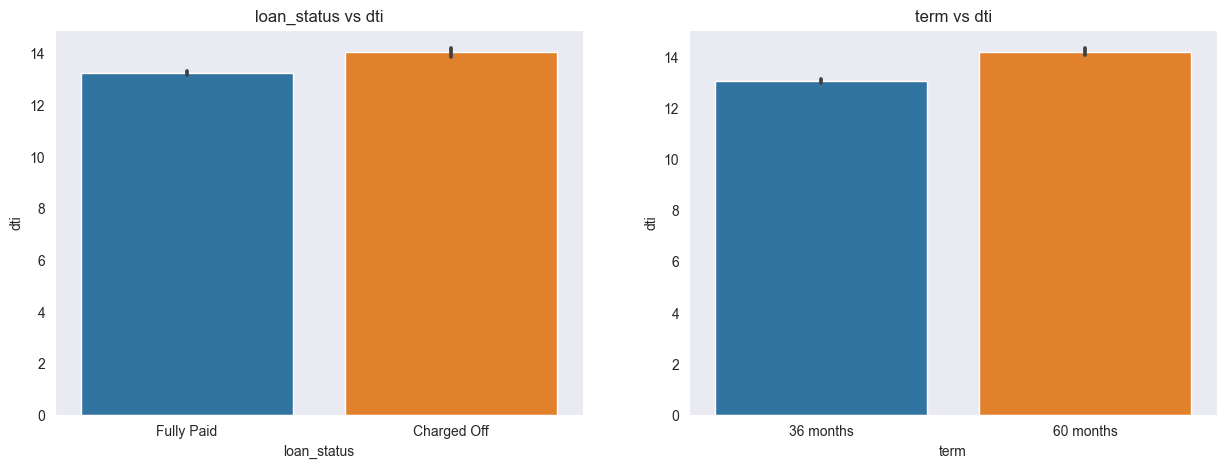

In [74]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='loan_status', y=refined_loan_data['dti'], data=refined_loan_data)
plt.title('loan_status vs dti')
plt.subplot(122)
sns.barplot(x='term', y=refined_loan_data['dti'], data=refined_loan_data)
plt.title('term vs dti')
plt.show()

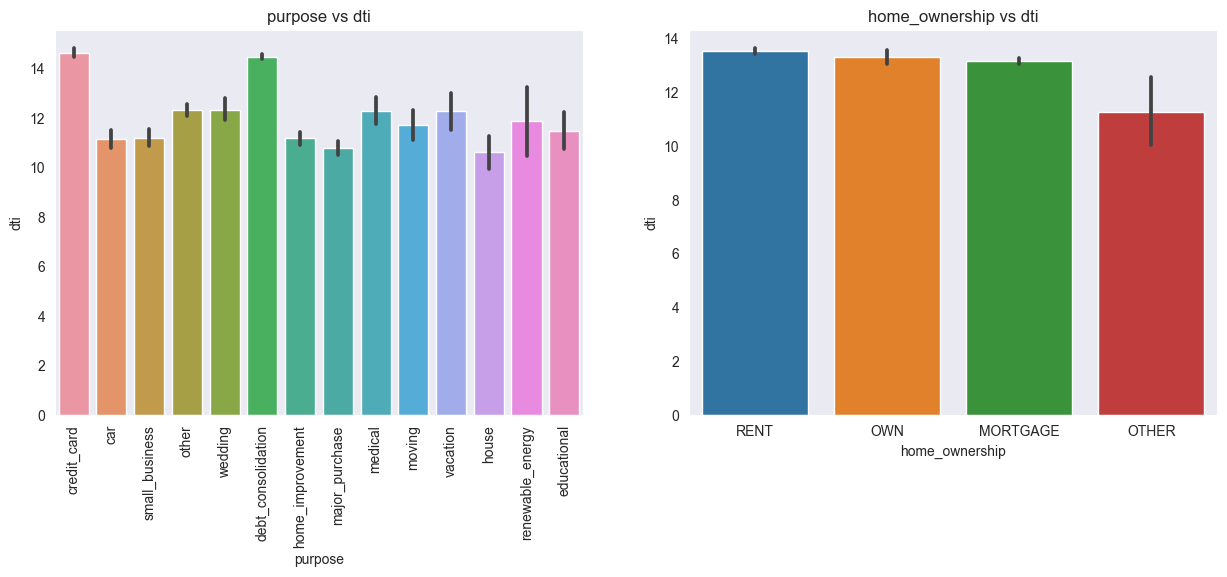

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='purpose', y=refined_loan_data['dti'], data=refined_loan_data)
plt.title('purpose vs dti')
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='home_ownership', y=refined_loan_data['dti'], data=refined_loan_data)
plt.title('home_ownership vs dti')
plt.show()

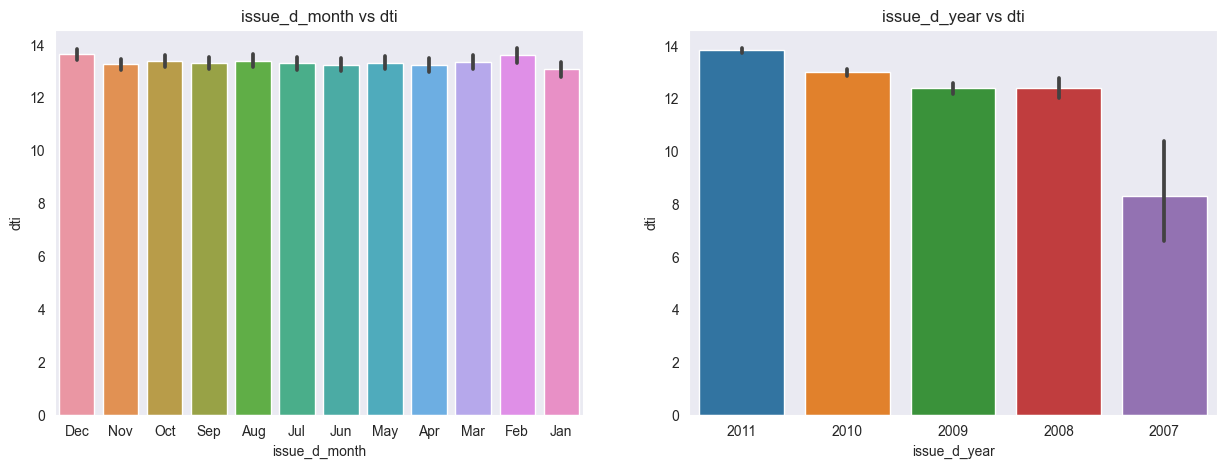

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='issue_d_month', y=refined_loan_data['dti'], data=refined_loan_data)
plt.title('issue_d_month vs dti')
plt.subplot(122)
sns.barplot(x='issue_d_year', y=refined_loan_data['dti'], data=refined_loan_data)
plt.title('issue_d_year vs dti')
plt.show()

### Observations
1) dti is high is Charged off and 60 month tenure loans
2) dti is high in debt consolidation and credit card loans
3) dti is high in 2011

## annual_inc

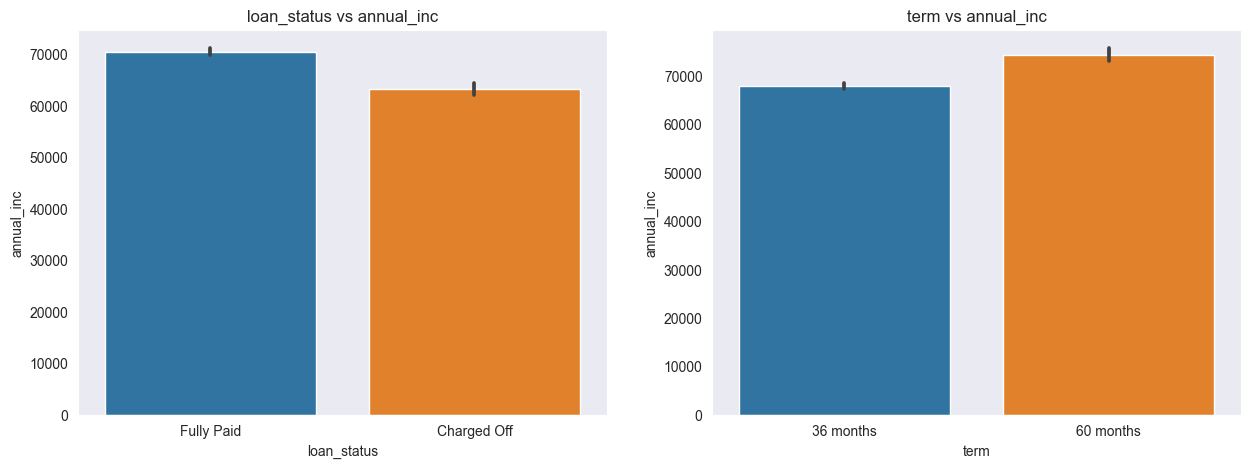

In [77]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='loan_status', y=refined_loan_data['annual_inc'], data=refined_loan_data)
plt.title('loan_status vs annual_inc')
plt.subplot(122)
sns.barplot(x='term', y=refined_loan_data['annual_inc'], data=refined_loan_data)
plt.title('term vs annual_inc')
plt.show()

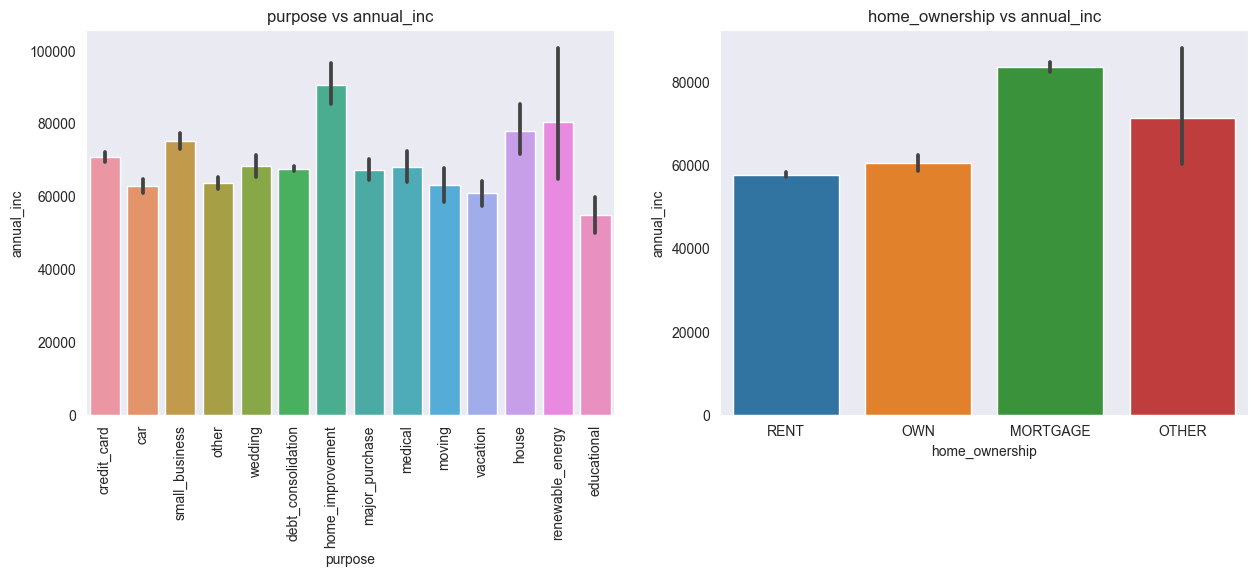

In [78]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='purpose', y=refined_loan_data['annual_inc'], data=refined_loan_data)
plt.title('purpose vs annual_inc')
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='home_ownership', y=refined_loan_data['annual_inc'], data=refined_loan_data)
plt.title('home_ownership vs annual_inc')
plt.show()

### Observations
1) Borrowers with higher annual income are more likely to completely pay off
2) Borrowers with higher annual income are more likely to opt for 60 month tenure loans
3) Borrowers with higher annual income are taking loan for home improvement
4) Borrowers with higher annual income are taking mortage loans

## Analysis to find the factors leading to defaulting

### Correlation Matrix

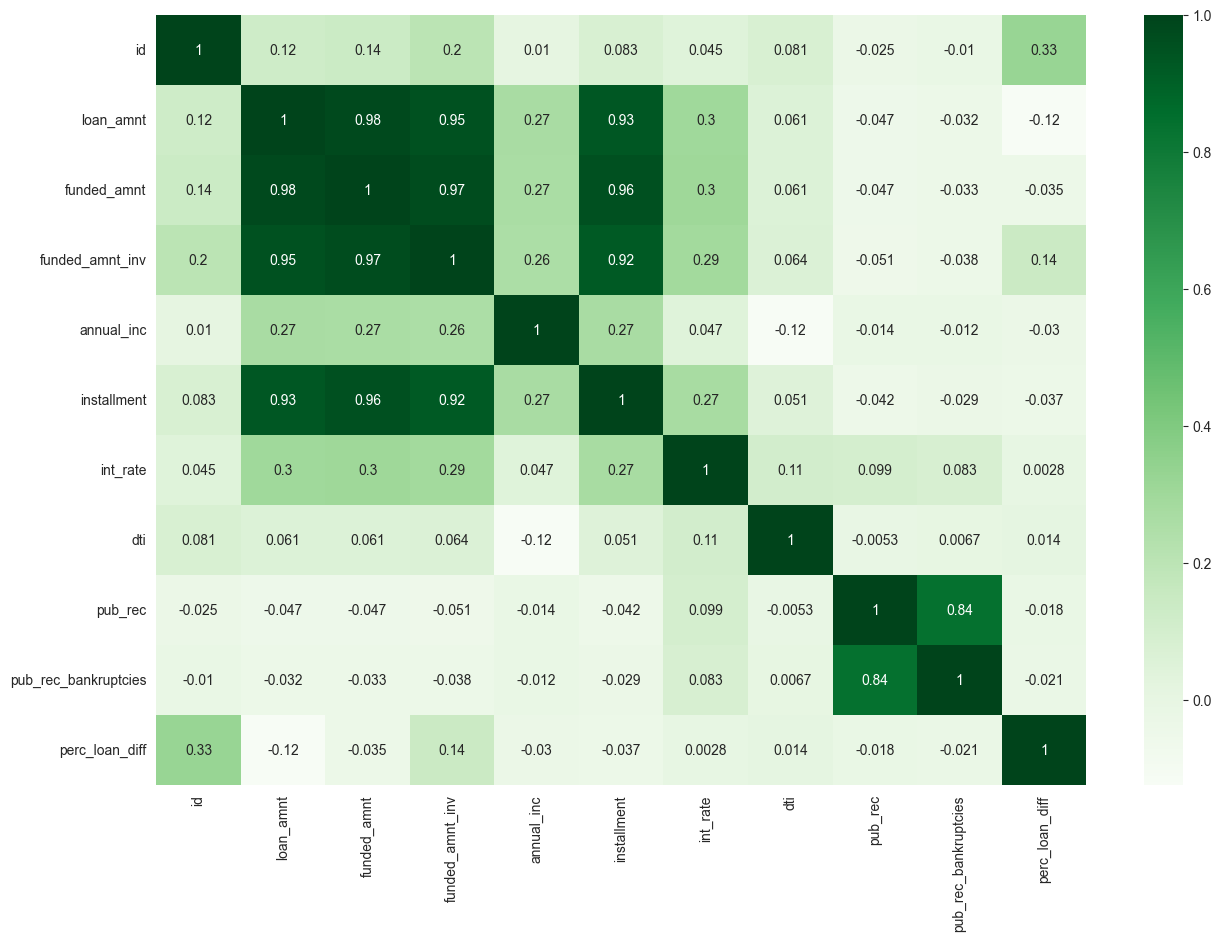

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(refined_loan_data.corr(), annot = True, cmap='Greens')
plt.show()

### Observations
1) No of derogatory public records is highly correlated with public record bankruptcies
2) loan_amnt, funded_amnt, funded_amnt_inv are also highly correlated. So analyzing the patterns in 1 of them will suffice

## Data Analysis (BiVariate)

### Defaulting wrt loan_amnt 

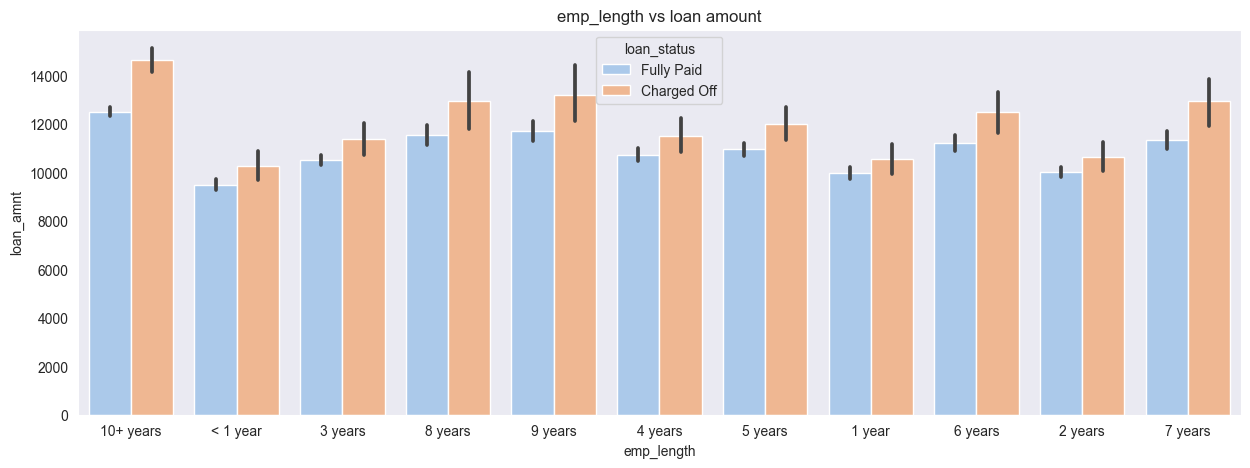

In [80]:
plt.figure(figsize=(15,5))
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('emp_length vs loan amount')
plt.show()

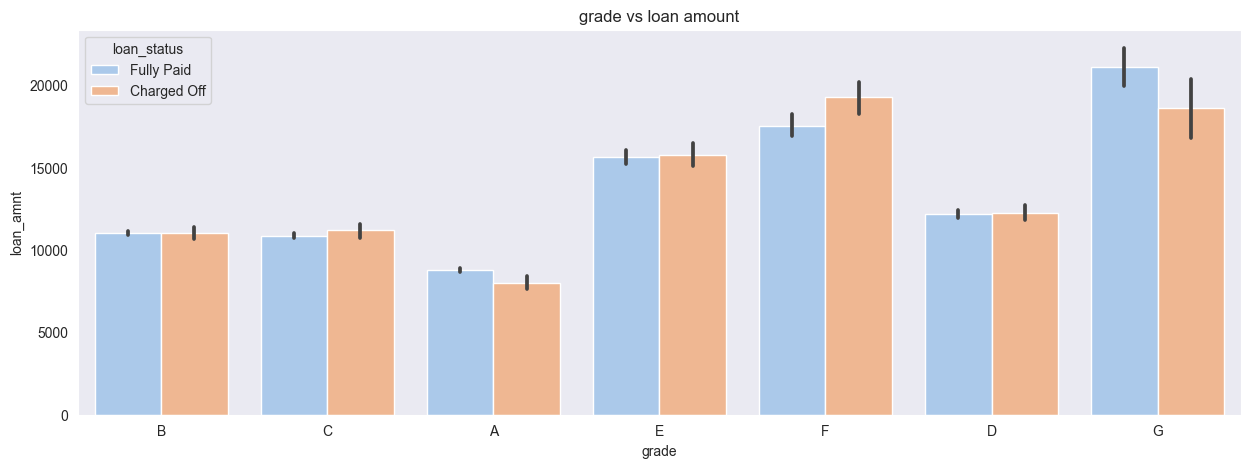

In [81]:
plt.figure(figsize=(15,5))
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('grade vs loan amount')
plt.show()

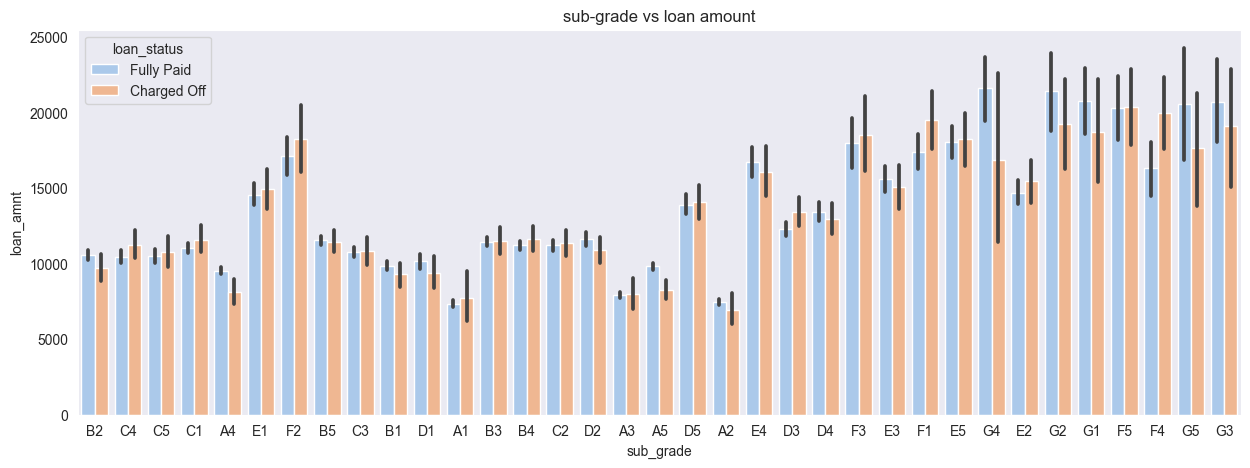

In [82]:
plt.figure(figsize=(15,5))
sns.barplot(x='sub_grade', y='loan_amnt', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('sub-grade vs loan amount')
plt.show()

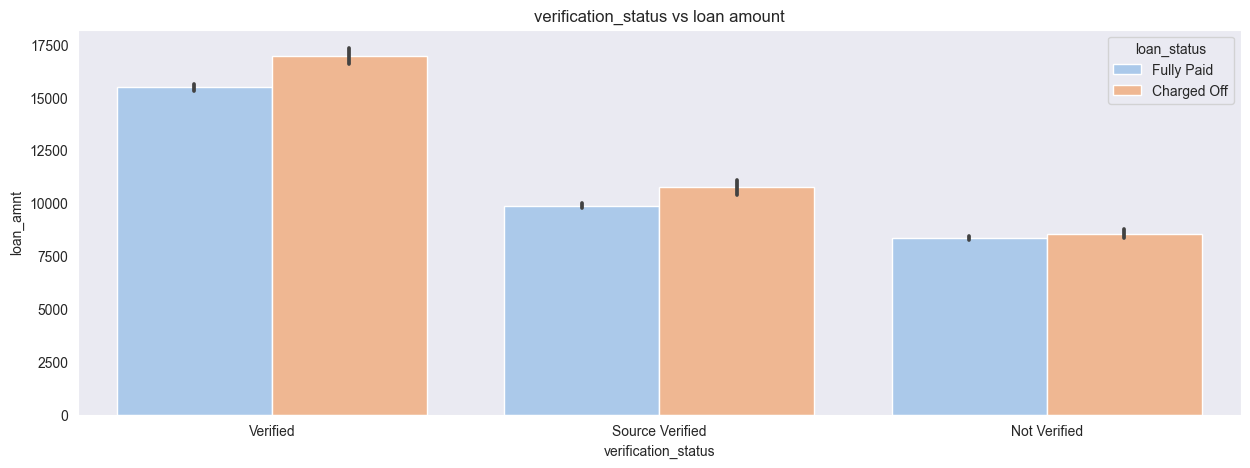

In [83]:
plt.figure(figsize=(15,5))
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('verification_status vs loan amount')
plt.show()

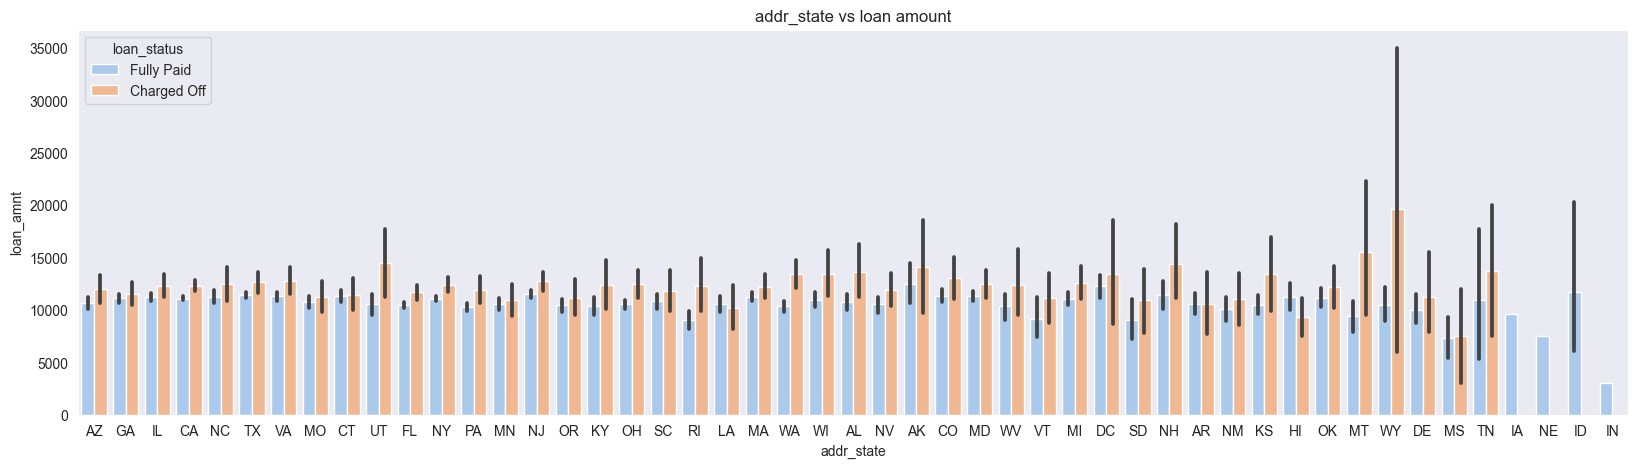

In [84]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('addr_state vs loan amount')
plt.show()

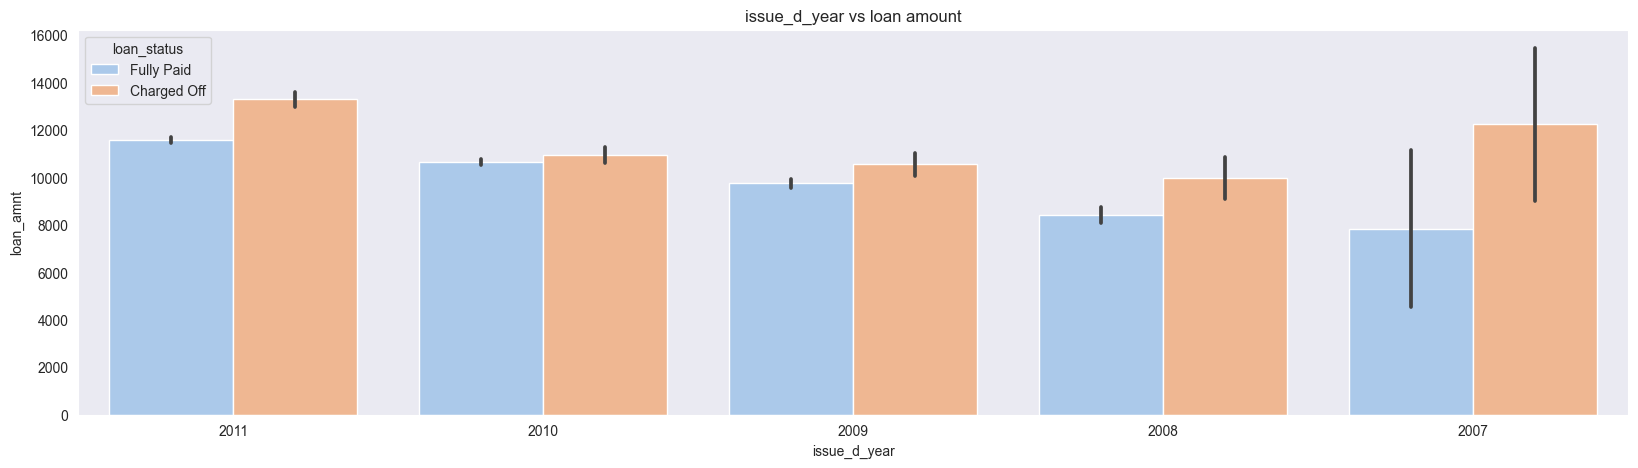

In [85]:
plt.figure(figsize=(20,5))
sns.barplot(x='issue_d_year', y='loan_amnt', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('issue_d_year vs loan amount')
plt.show()

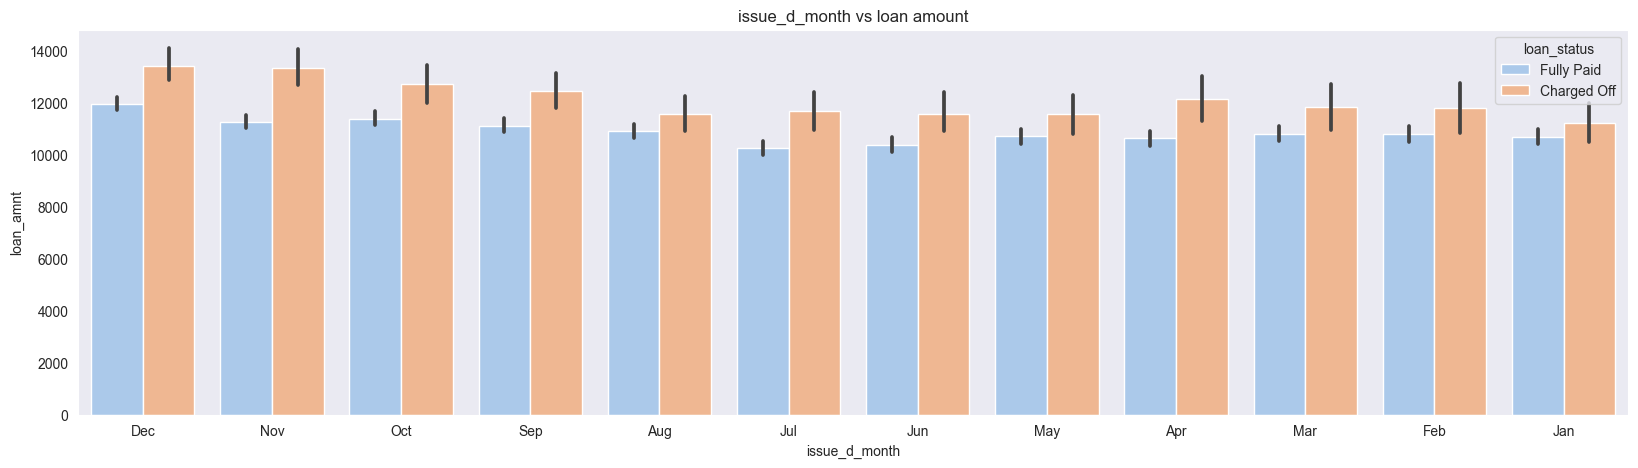

In [86]:
plt.figure(figsize=(20,5))
sns.barplot(x='issue_d_month', y='loan_amnt', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('issue_d_month vs loan amount')
plt.show()

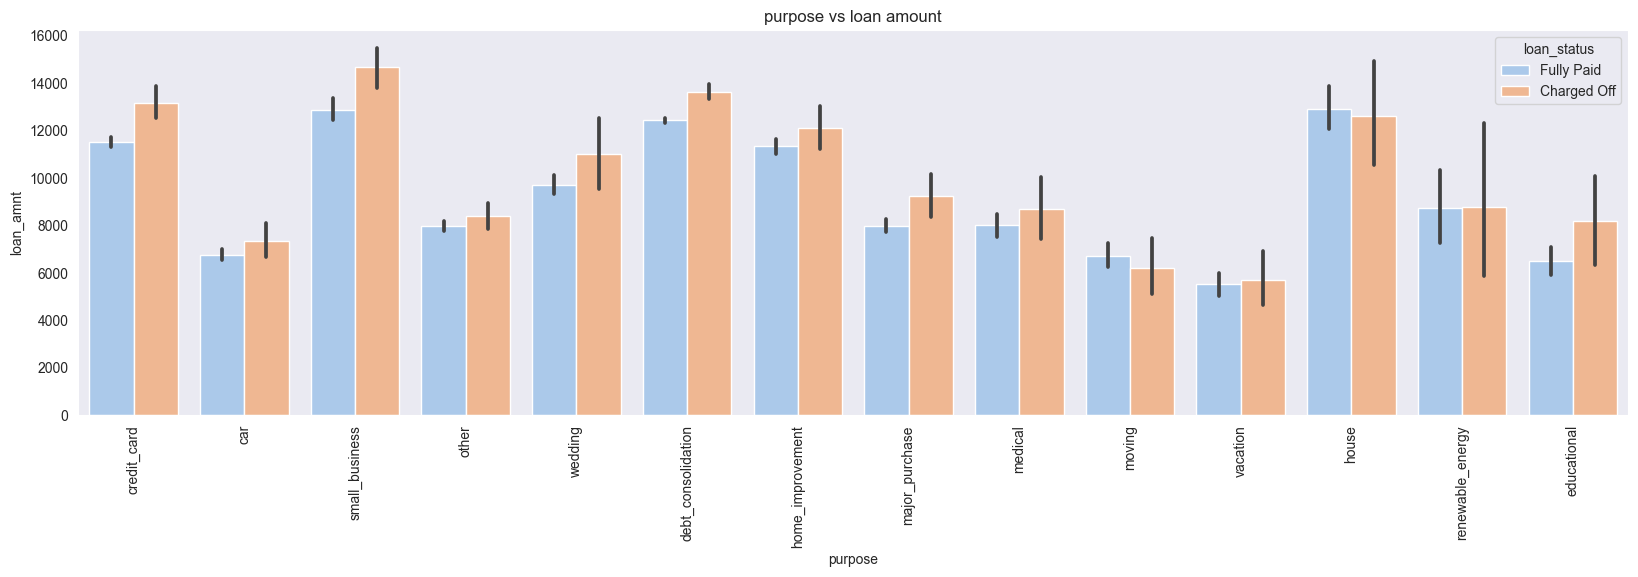

In [87]:
plt.figure(figsize=(20,5))
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.xticks(rotation=90)
plt.title('purpose vs loan amount')
plt.show()

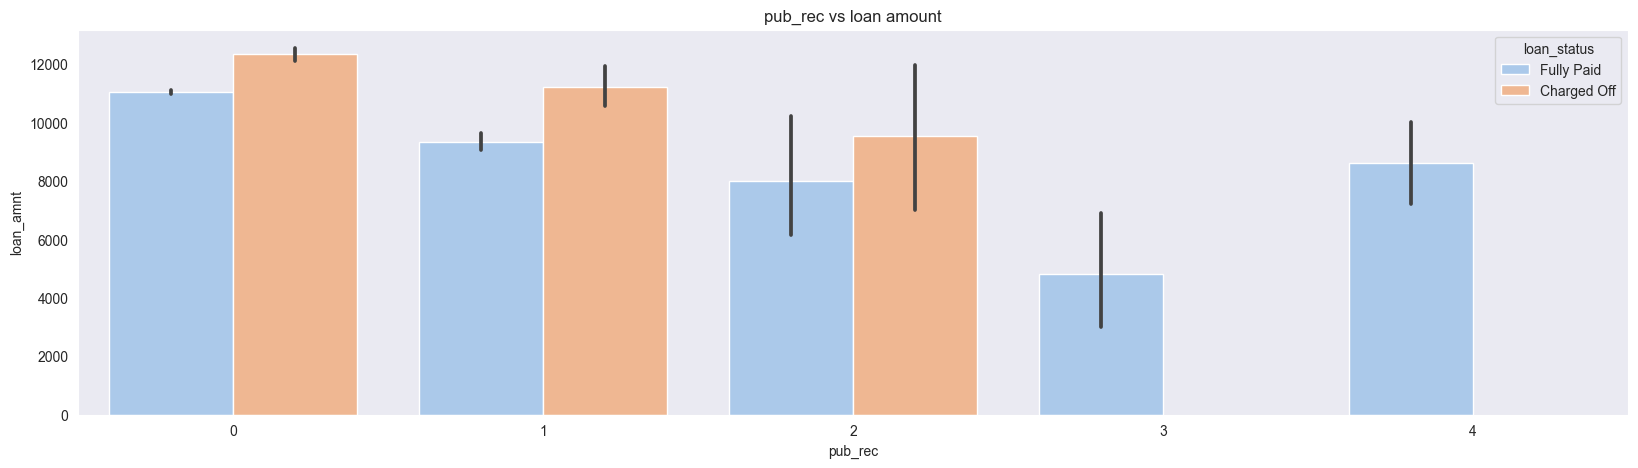

In [88]:
plt.figure(figsize=(20,5))
sns.barplot(x='pub_rec', y='loan_amnt', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('pub_rec vs loan amount')
plt.show()

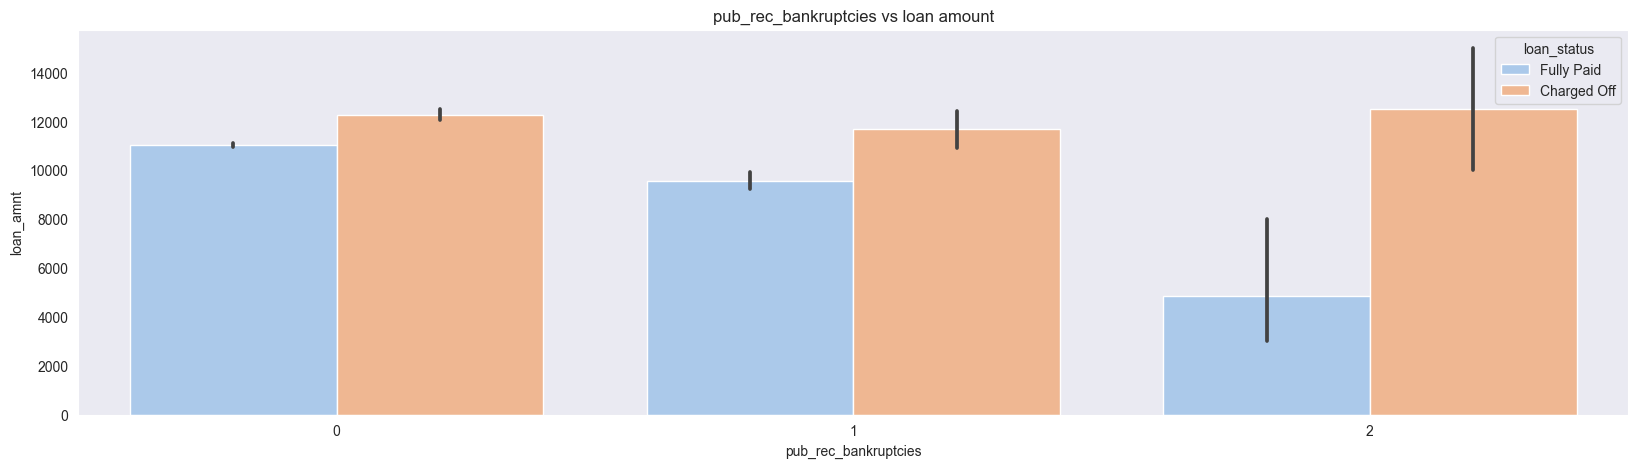

In [89]:
plt.figure(figsize=(20,5))
sns.barplot(x='pub_rec_bankruptcies', y='loan_amnt', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('pub_rec_bankruptcies vs loan amount')
plt.show()

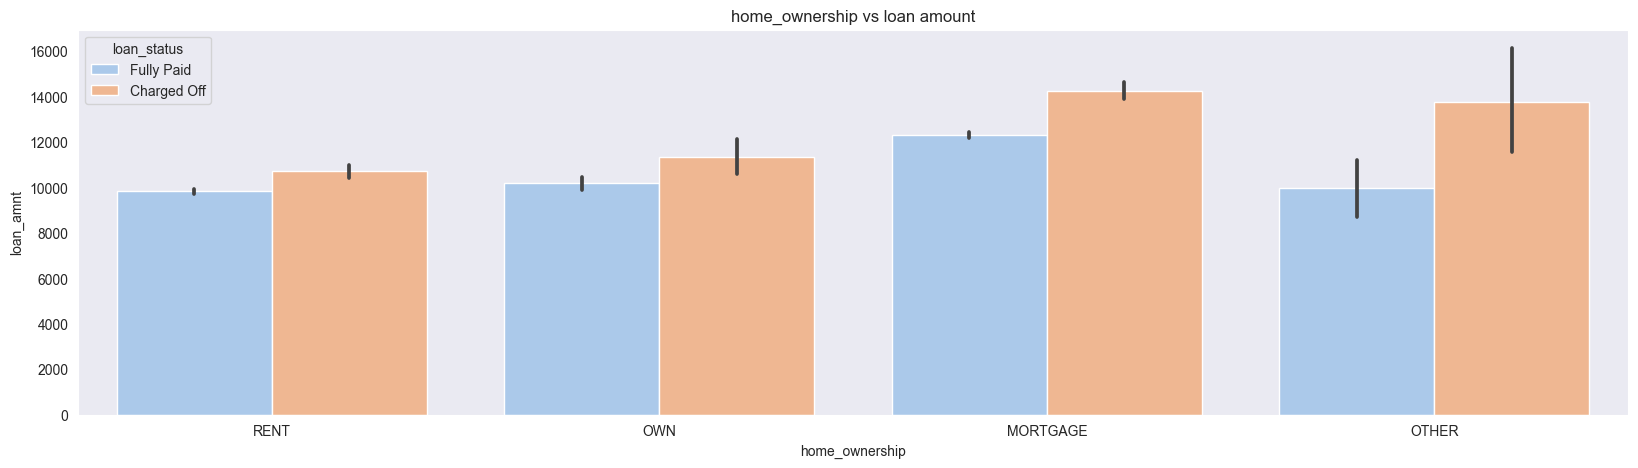

In [90]:
plt.figure(figsize=(20,5))
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('home_ownership vs loan amount')
plt.show()

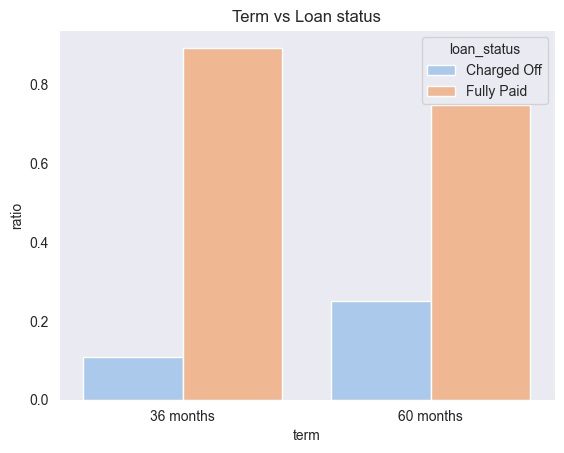

In [91]:
#Calculating the ratio of paid and defaulted
df = refined_loan_data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['ratio'] = df['id'] / df.groupby('term').transform('sum')['id']
sns.barplot(x='term', y='ratio', hue='loan_status', data=df,palette="pastel")
plt.title('Term vs Loan status')
plt.show()

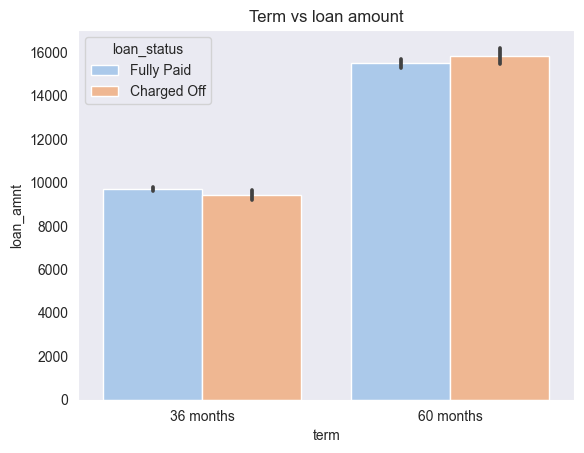

In [92]:
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('Term vs loan amount')
plt.show()

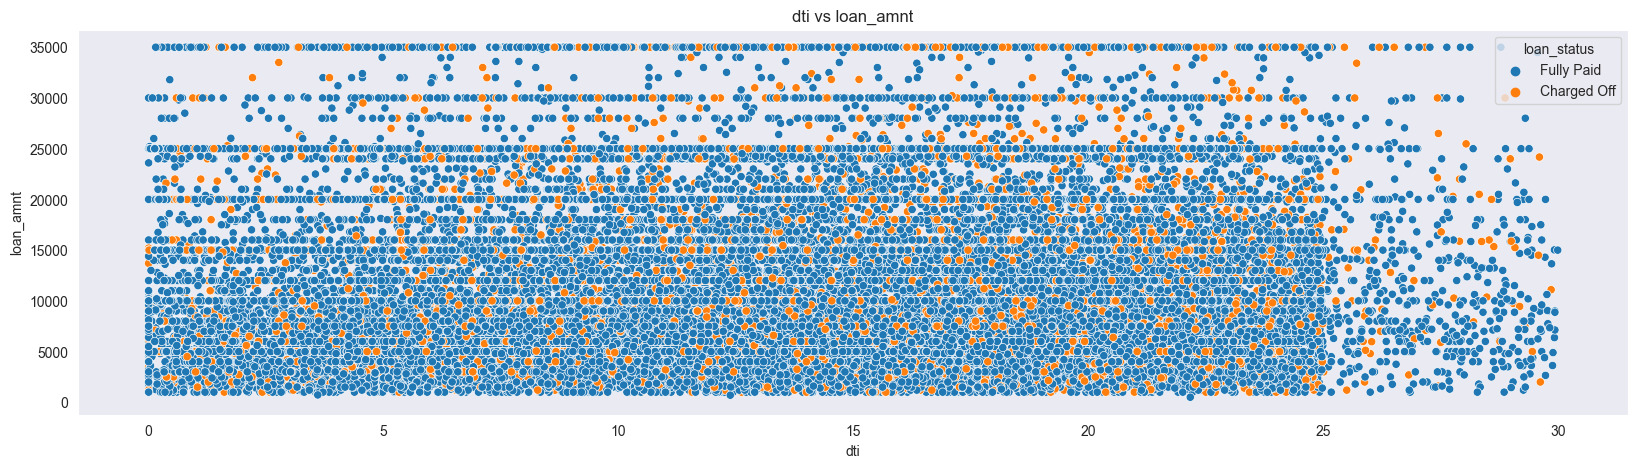

In [93]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='dti', y='loan_amnt',data=refined_loan_data, hue='loan_status')
#, hue='loan_status', data=refined_loan_data)
plt.title('dti vs loan_amnt')
plt.show()

### Observations
1) Borrowers with 10+ years of employement took higher loan amounts and the defaulting rate is also high
2) In loans of type G and F the difference between paid and defaulted is more. F type loan borrowers are defaulting more compared to others
3) Out of F type loans only F5 subtype has no paid default difference
4) Verified borrowers took higher amount of loans and the default rate is also high comparatively
5) Borrowers from WY, MT took higher and the default rate is also high comparatively. Borrowers from IA,NE,ID,IN are more likely to fully repay compared to other states
6) No pattern with issued month and loan amount
7) Borrowers took higher amounts for small business, credit card, debt_considation and default rate is also higher
8) Borrowers with more public bankruptcies records are likely to default
9) Borrowers with mortage and 'other' home ownerships took higher loan amounts and the default rate is also higher
10) Default rate is high in both the tenures irrespective of loan amount
11) No specific pattern in dti vs loan_amnt
12) Loan amnt is not deciding the default rate

### Defaulting wrt annual income

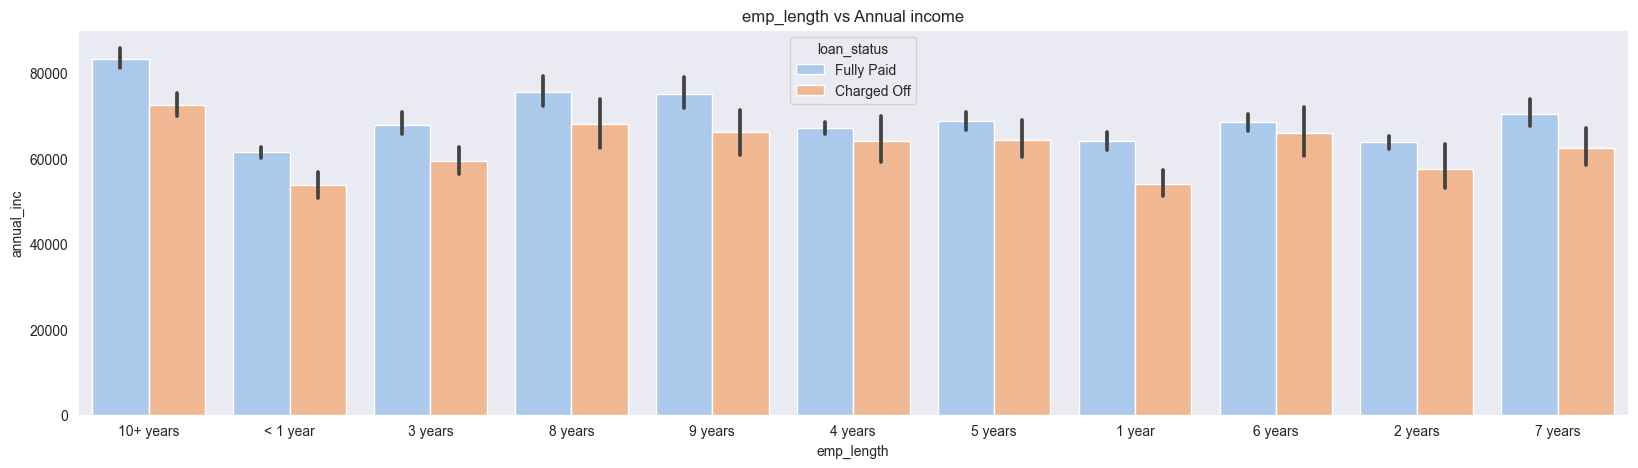

In [94]:
plt.figure(figsize=(20,5))
sns.barplot(x='emp_length', y='annual_inc', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('emp_length vs Annual income')
plt.show()

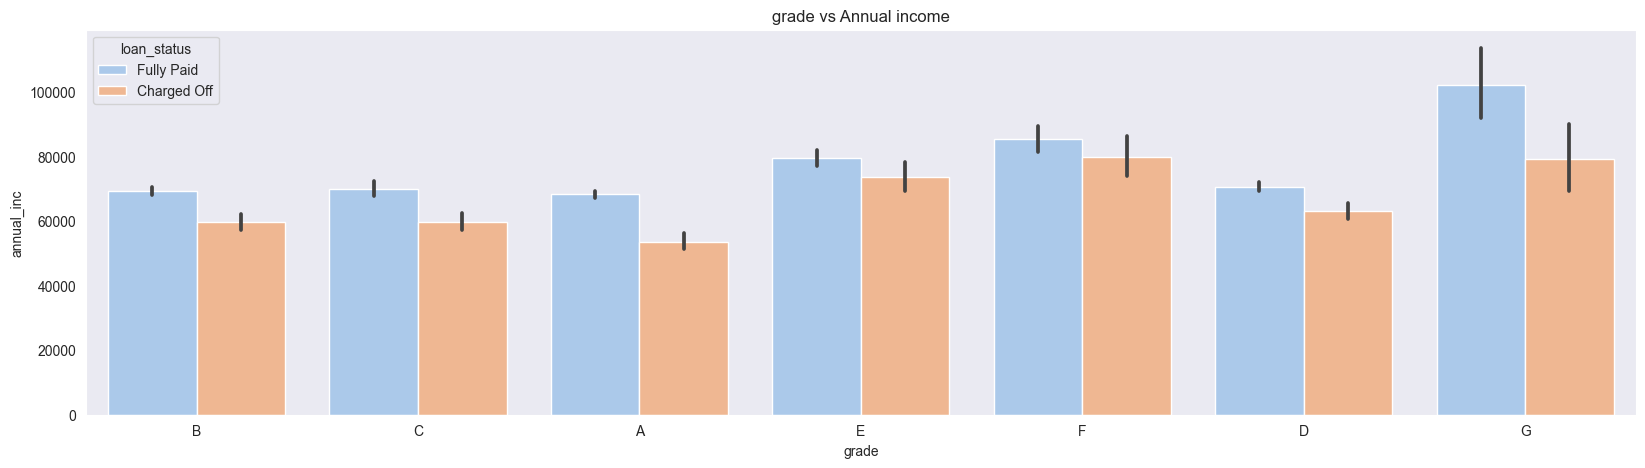

In [95]:
plt.figure(figsize=(20,5))
sns.barplot(x='grade', y='annual_inc', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('grade vs Annual income')
plt.show()

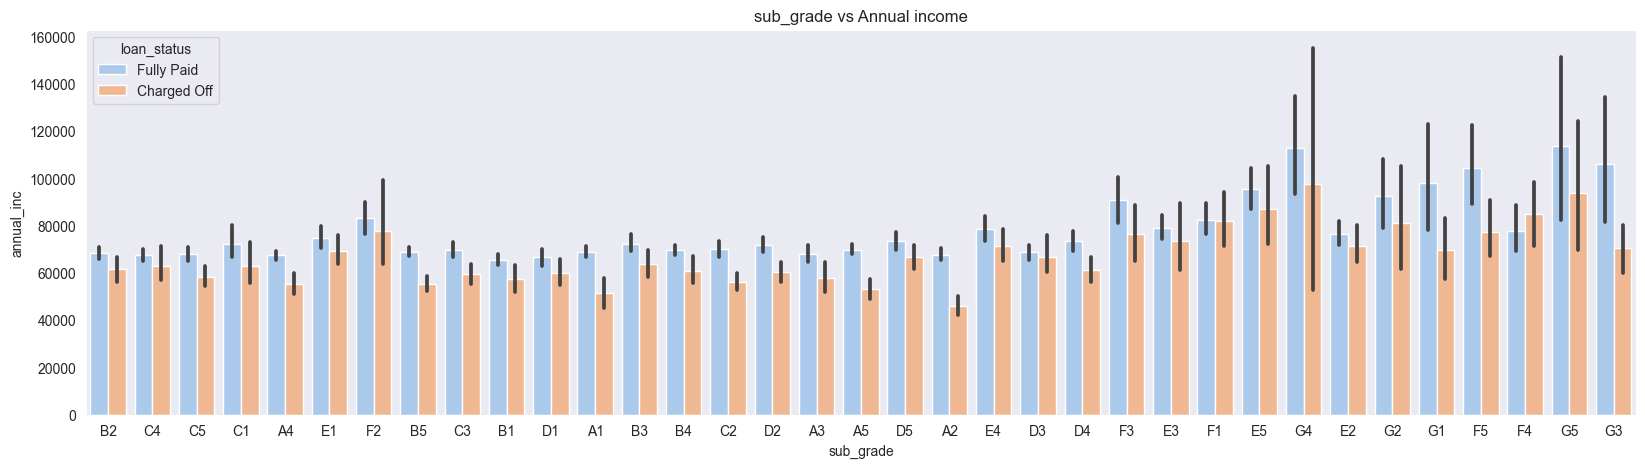

In [96]:
plt.figure(figsize=(20,5))
sns.barplot(x='sub_grade', y='annual_inc', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('sub_grade vs Annual income')
plt.show()

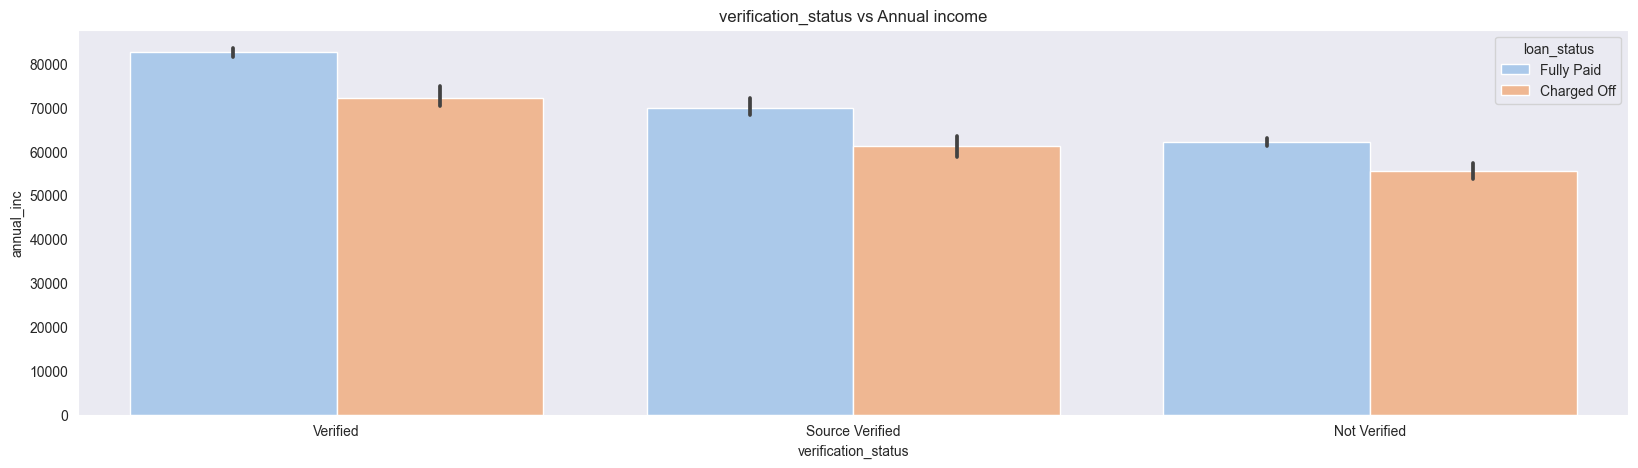

In [97]:
plt.figure(figsize=(20,5))
sns.barplot(x='verification_status', y='annual_inc', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('verification_status vs Annual income')
plt.show()

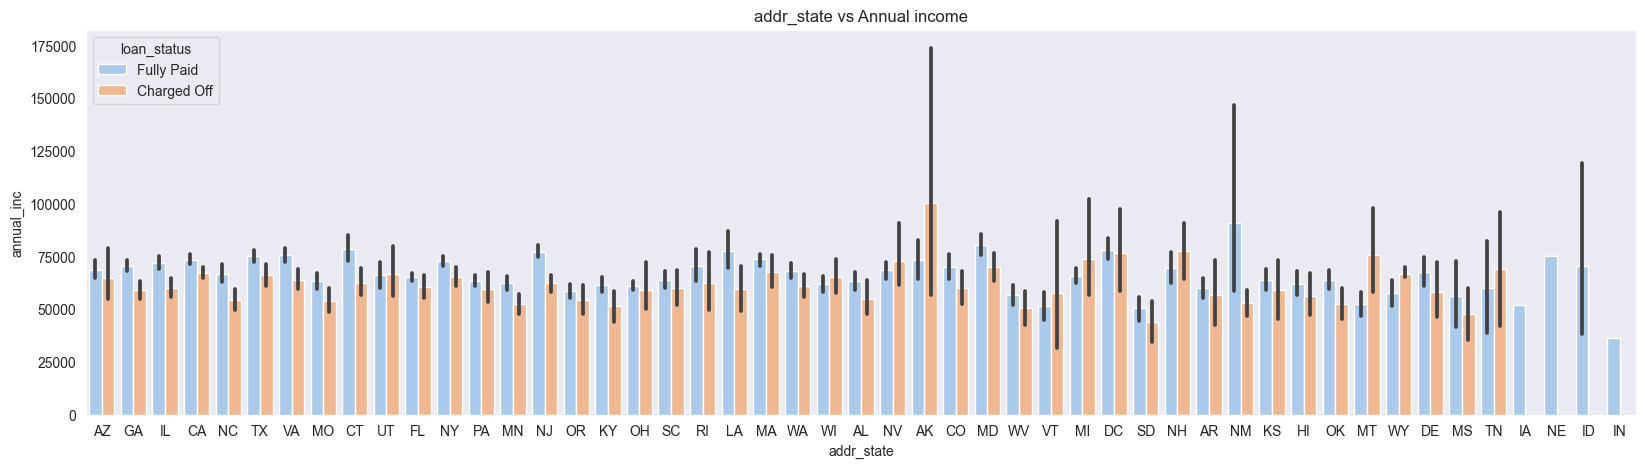

In [98]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='annual_inc', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('addr_state vs Annual income')
plt.show()

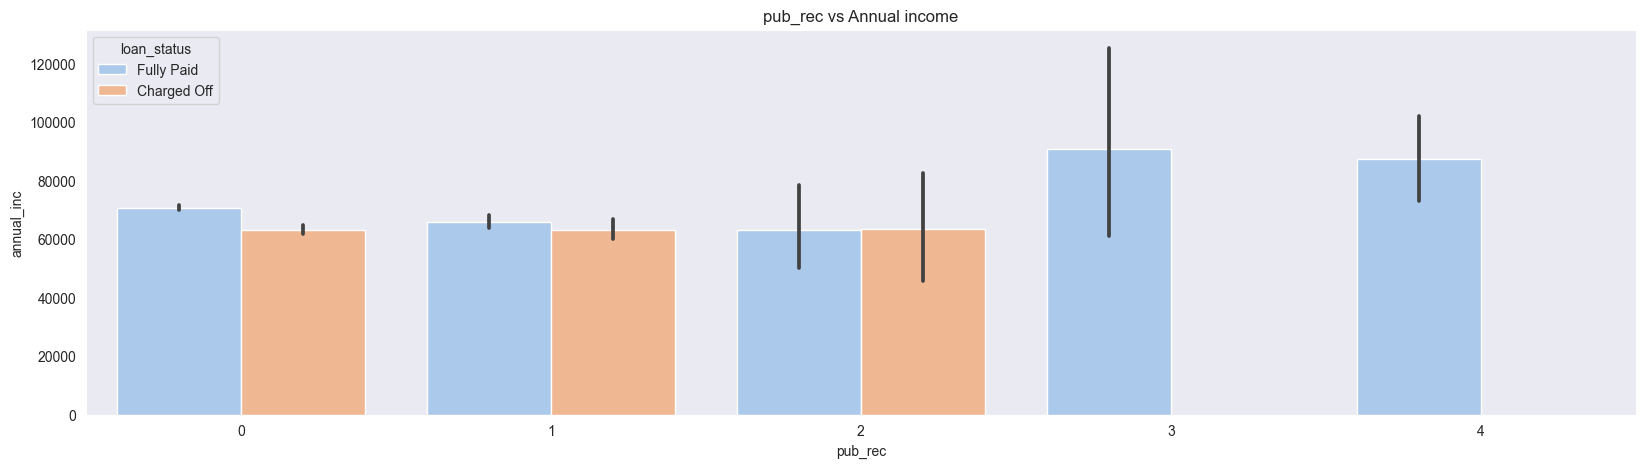

In [99]:
plt.figure(figsize=(20,5))
sns.barplot(x='pub_rec', y='annual_inc', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('pub_rec vs Annual income')
plt.show()

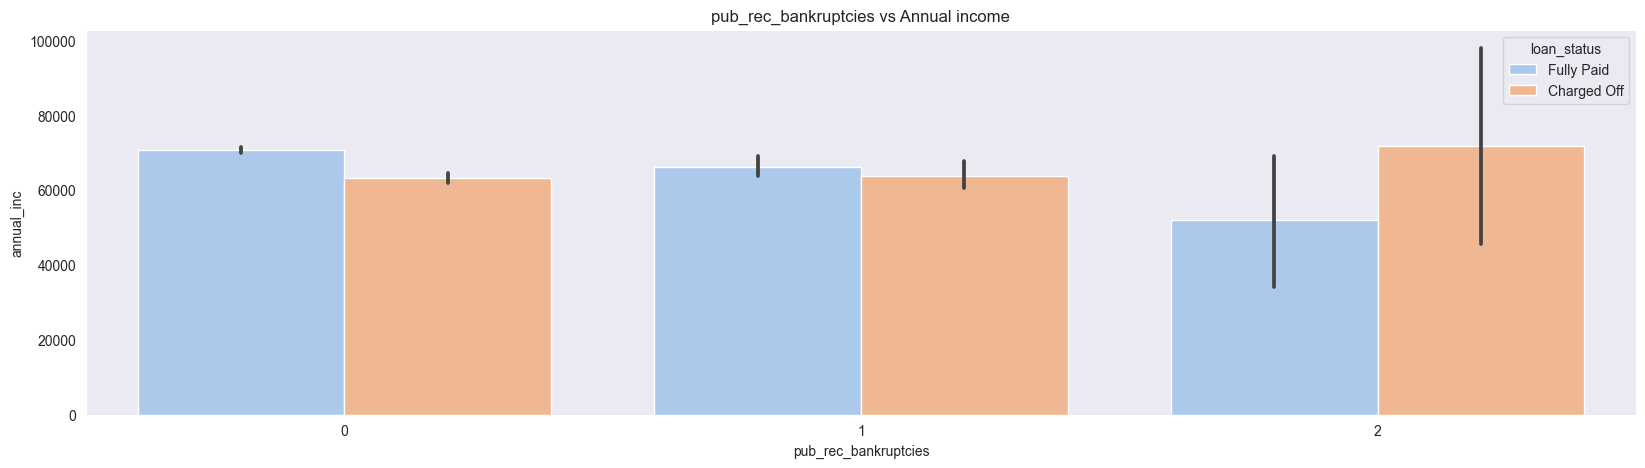

In [100]:
plt.figure(figsize=(20,5))
sns.barplot(x='pub_rec_bankruptcies', y='annual_inc', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('pub_rec_bankruptcies vs Annual income')
plt.show()

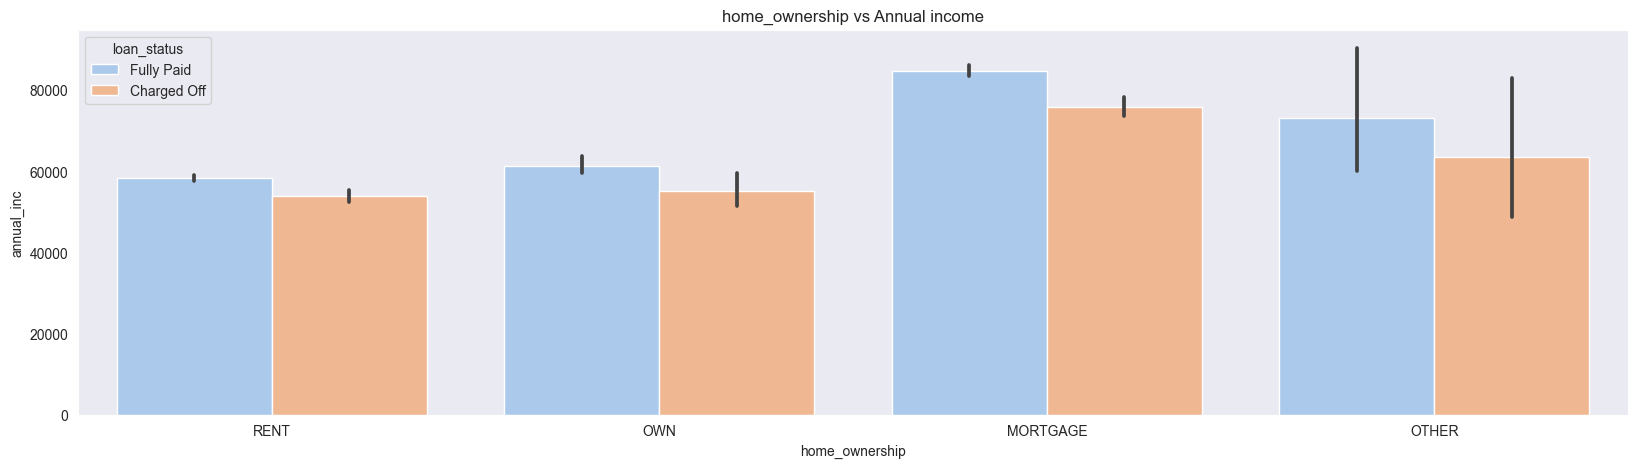

In [101]:
plt.figure(figsize=(20,5))
sns.barplot(x='home_ownership', y='annual_inc', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('home_ownership vs Annual income')
plt.show()

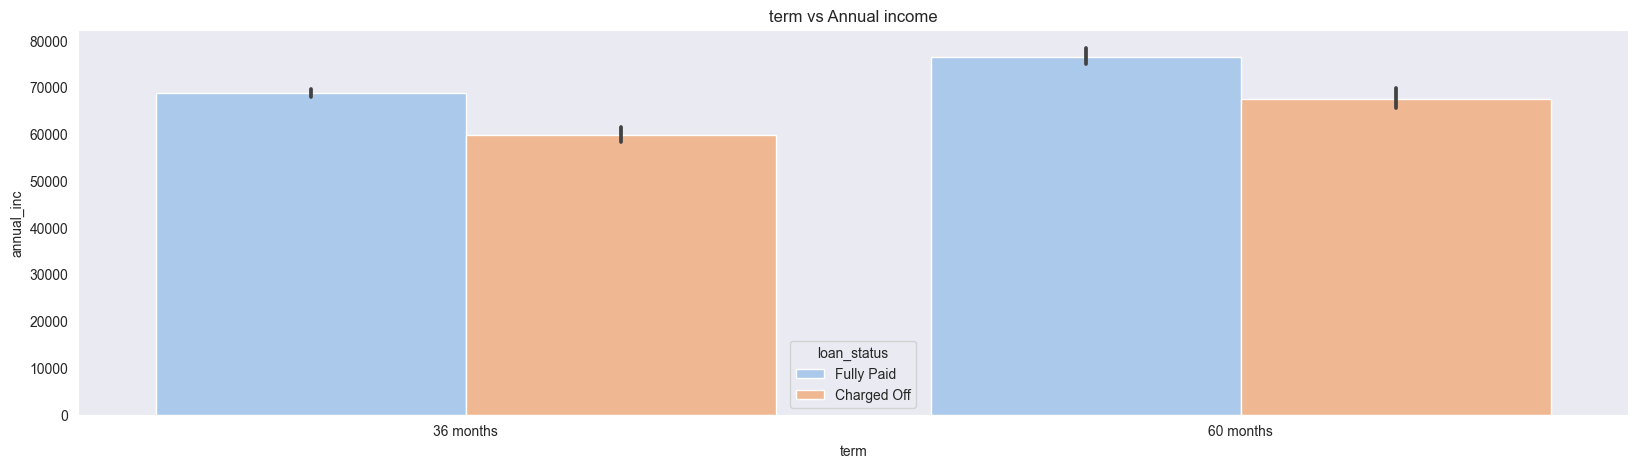

In [102]:
plt.figure(figsize=(20,5))
sns.barplot(x='term', y='annual_inc', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('term vs Annual income')
plt.show()

### Observations
1) No interesting patterns observed in the plots wrt annual income
2) Annual income is high for borrowers from AK state and the default rate is also high

## Defaulting wrt interest rate

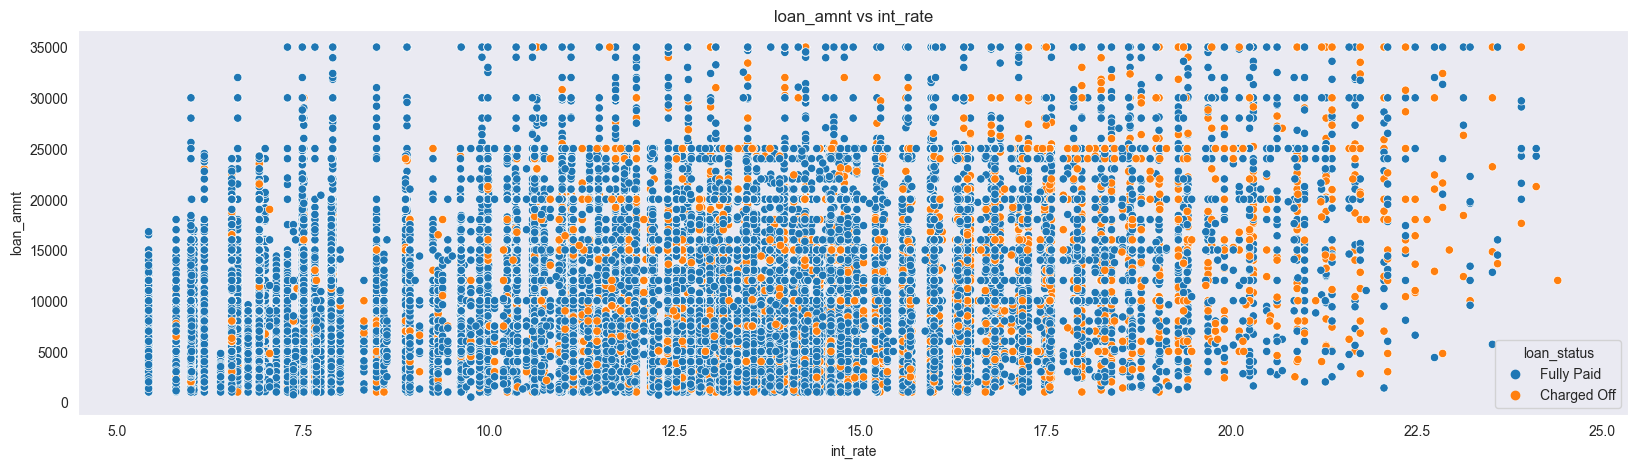

In [103]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='int_rate', y='loan_amnt',data=refined_loan_data, hue='loan_status')
#, hue='loan_status', data=refined_loan_data)
plt.title('loan_amnt vs int_rate')
plt.show()

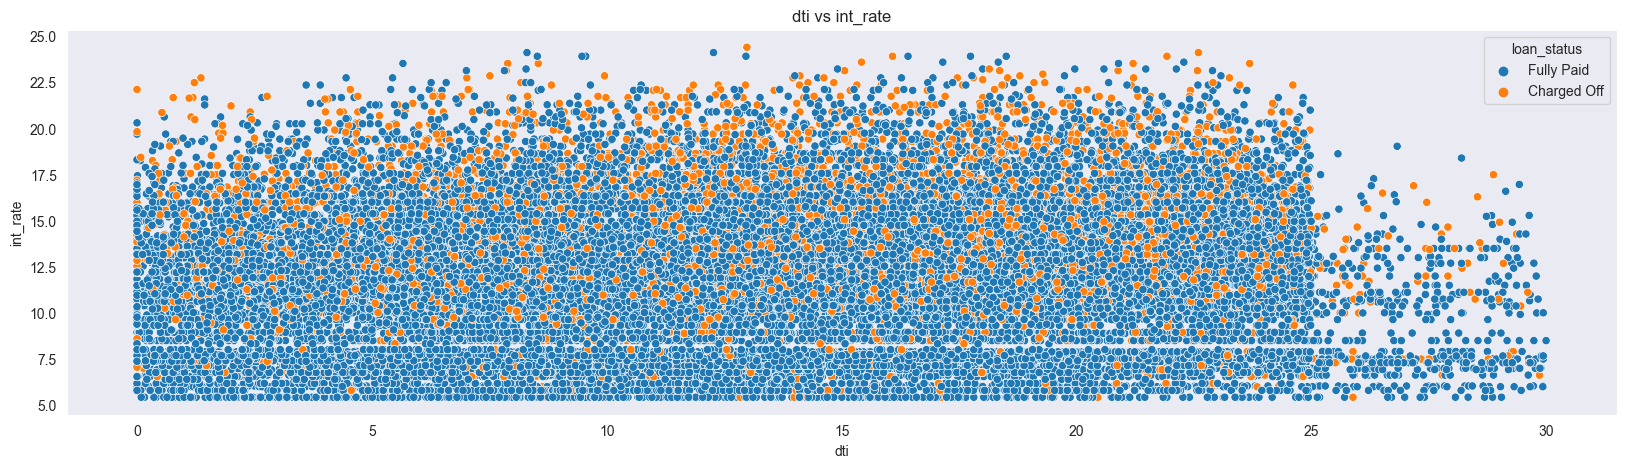

In [104]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='dti', y='int_rate',data=refined_loan_data, hue='loan_status')
#, hue='loan_status', data=refined_loan_data)
plt.title('dti vs int_rate')
plt.show()

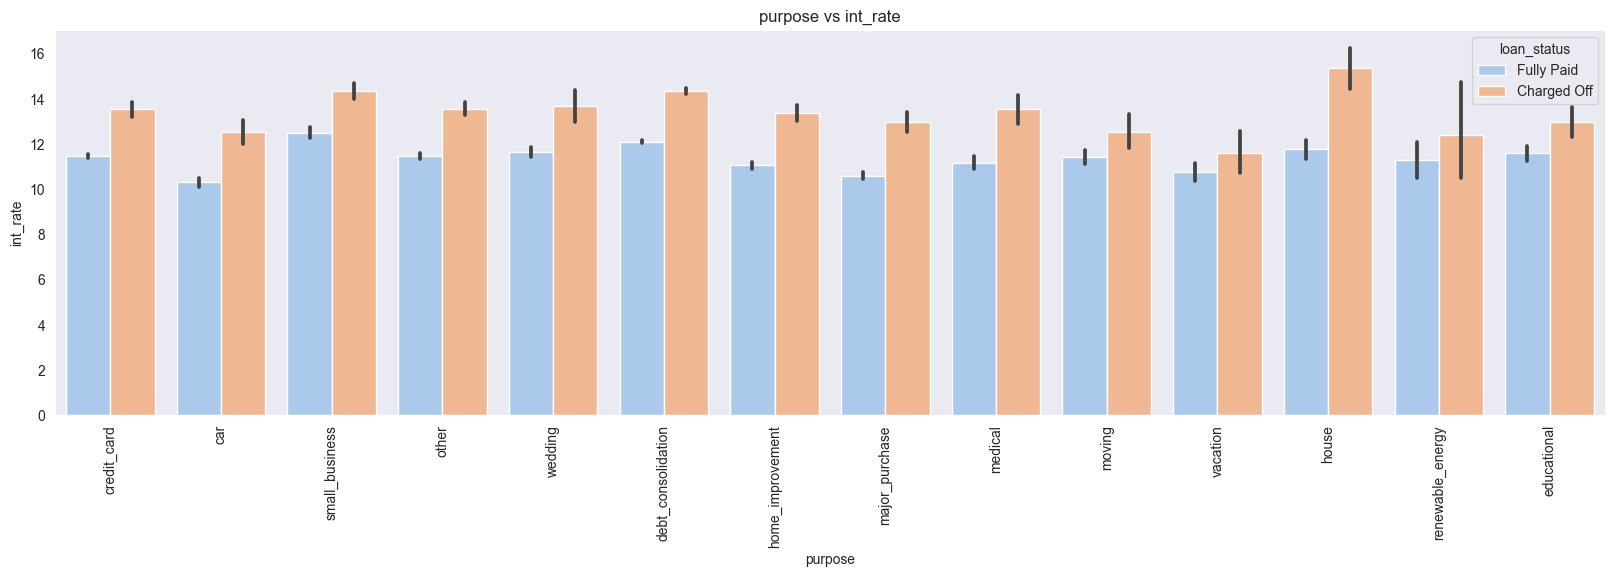

In [105]:
plt.figure(figsize=(20,5))
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.xticks(rotation=90)
plt.title('purpose vs int_rate')
plt.show()

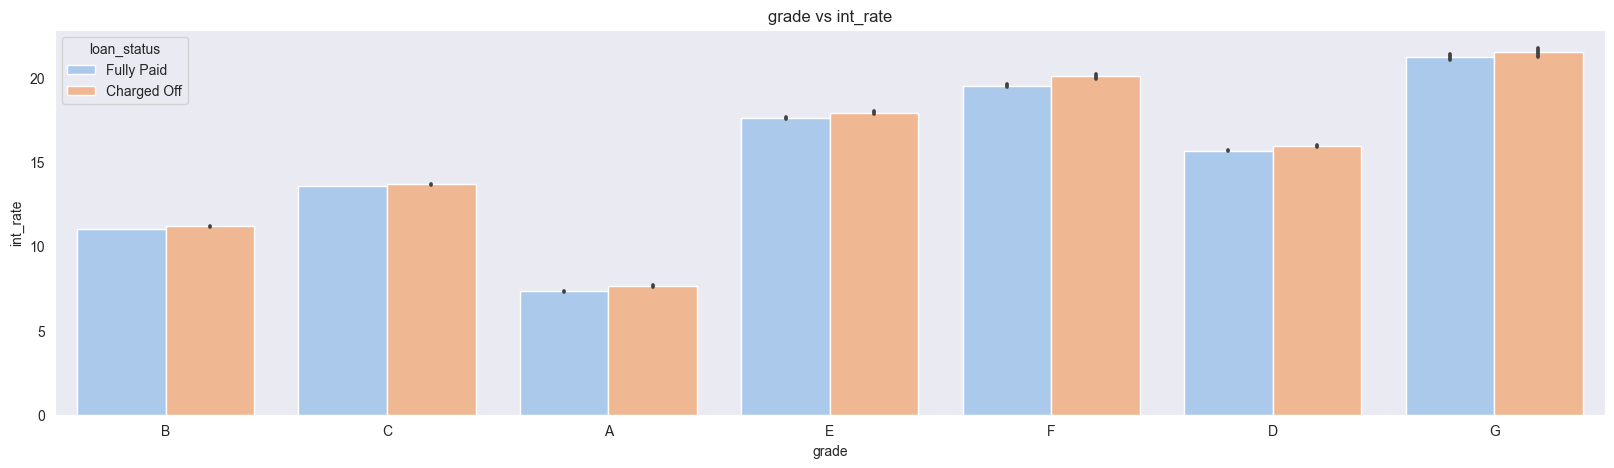

In [106]:
plt.figure(figsize=(20,5))
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('grade vs int_rate')
plt.show()

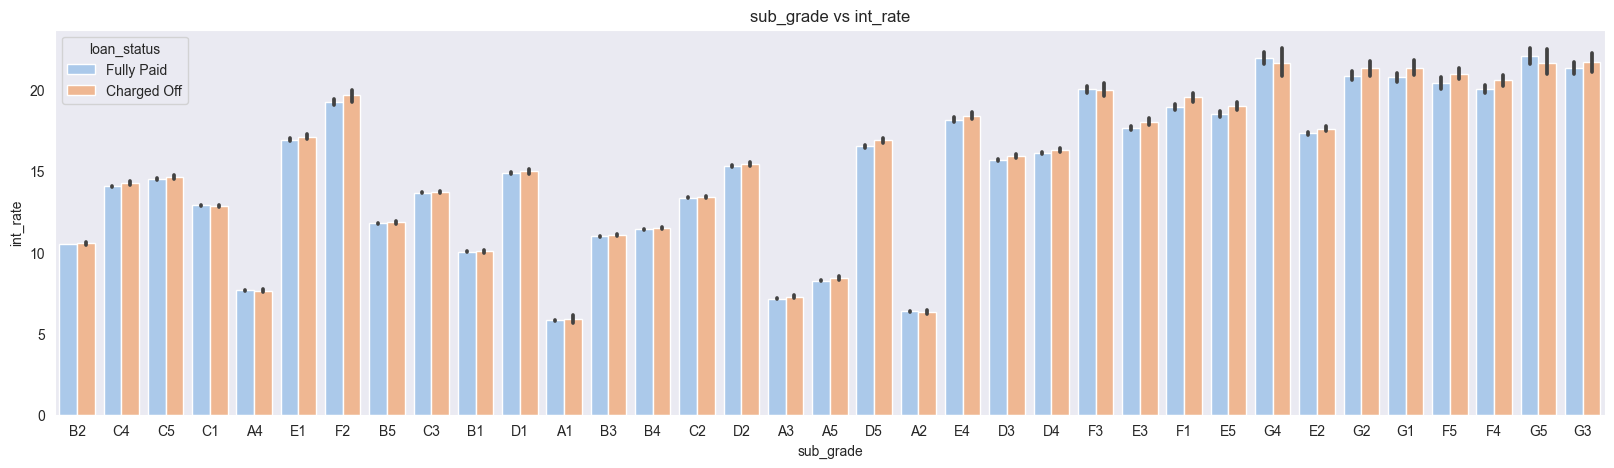

In [107]:
plt.figure(figsize=(20,5))
sns.barplot(x='sub_grade', y='int_rate', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('sub_grade vs int_rate')
plt.show()

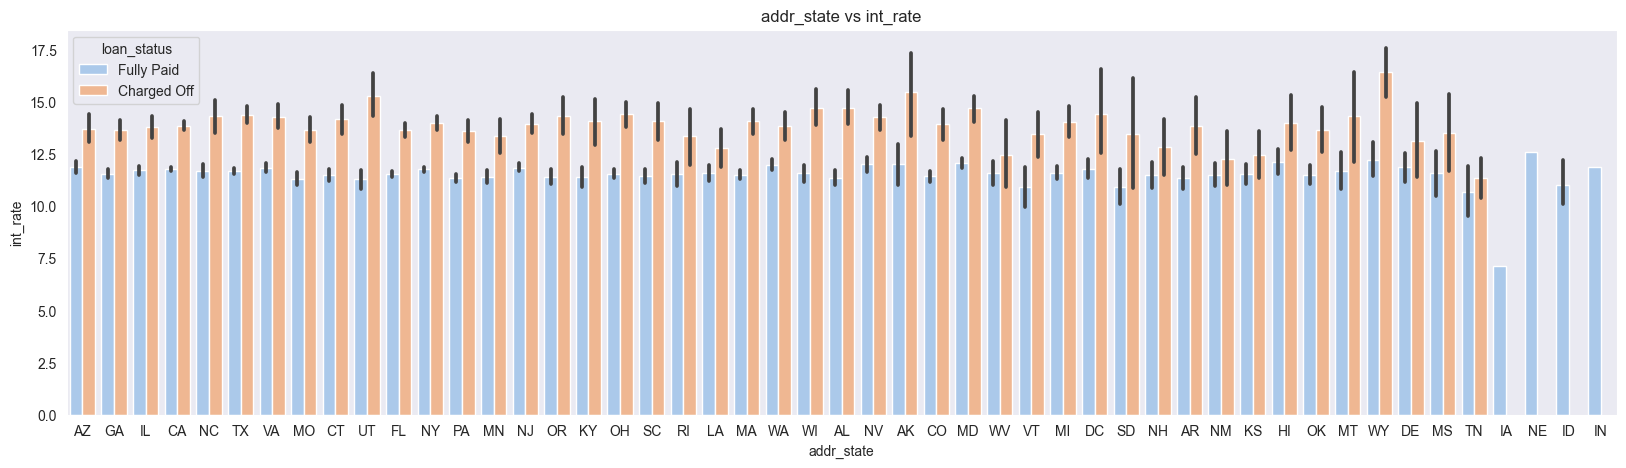

In [108]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='int_rate', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('addr_state vs int_rate')
plt.show()

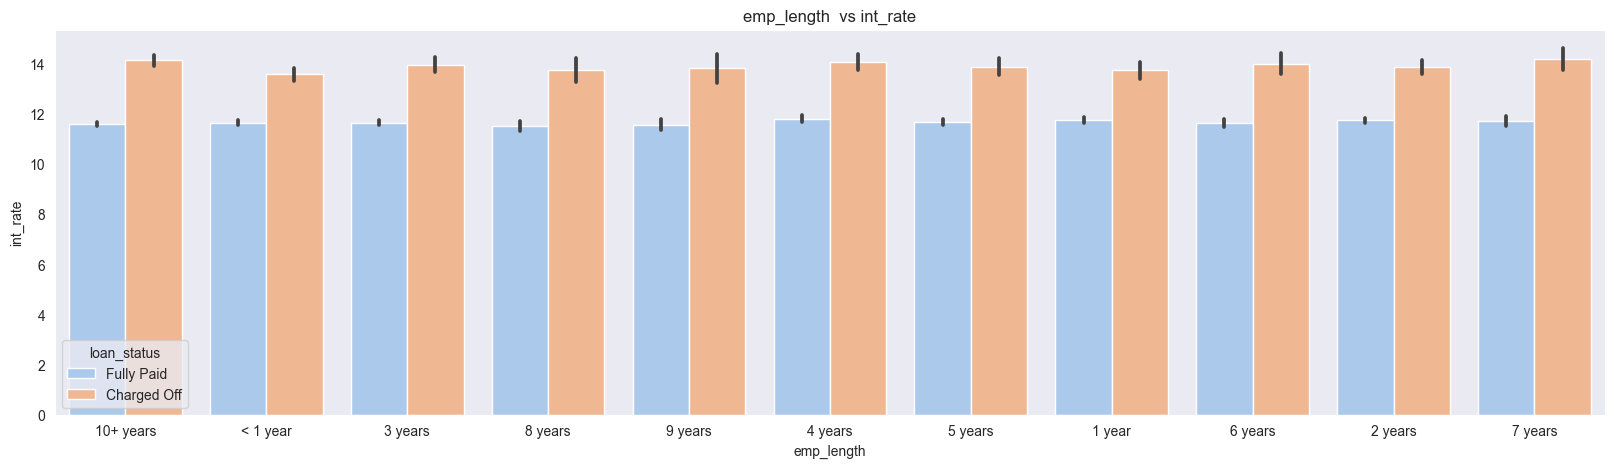

In [109]:
plt.figure(figsize=(20,5))
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('emp_length  vs int_rate')
plt.show()

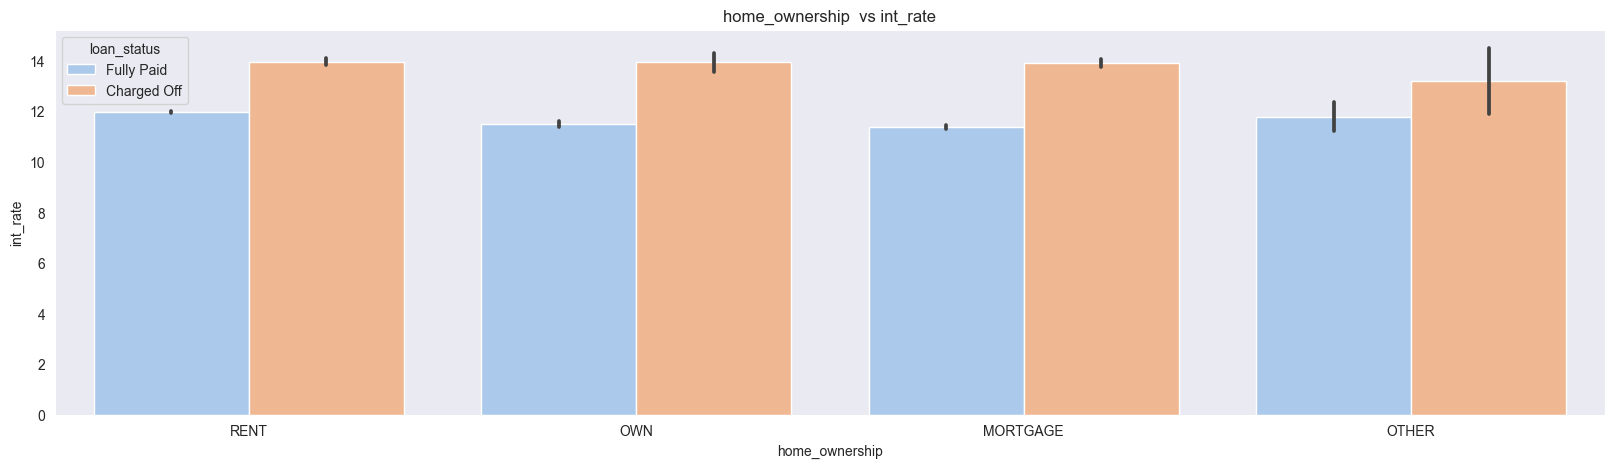

In [110]:
plt.figure(figsize=(20,5))
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('home_ownership  vs int_rate')
plt.show()

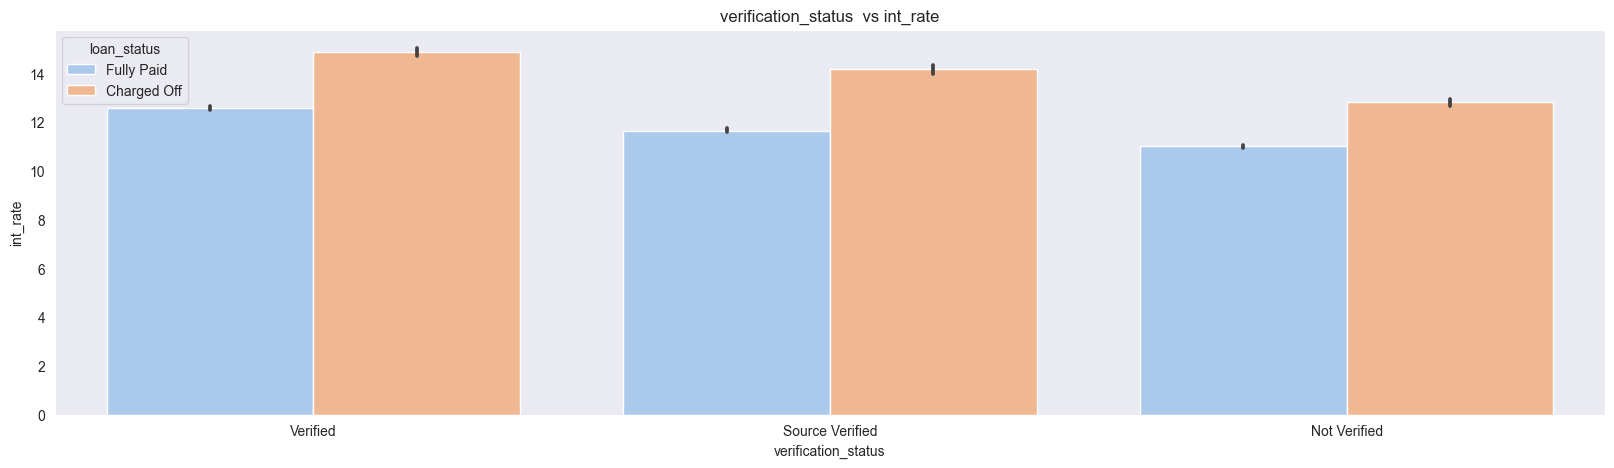

In [111]:
plt.figure(figsize=(20,5))
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('verification_status  vs int_rate')
plt.show()

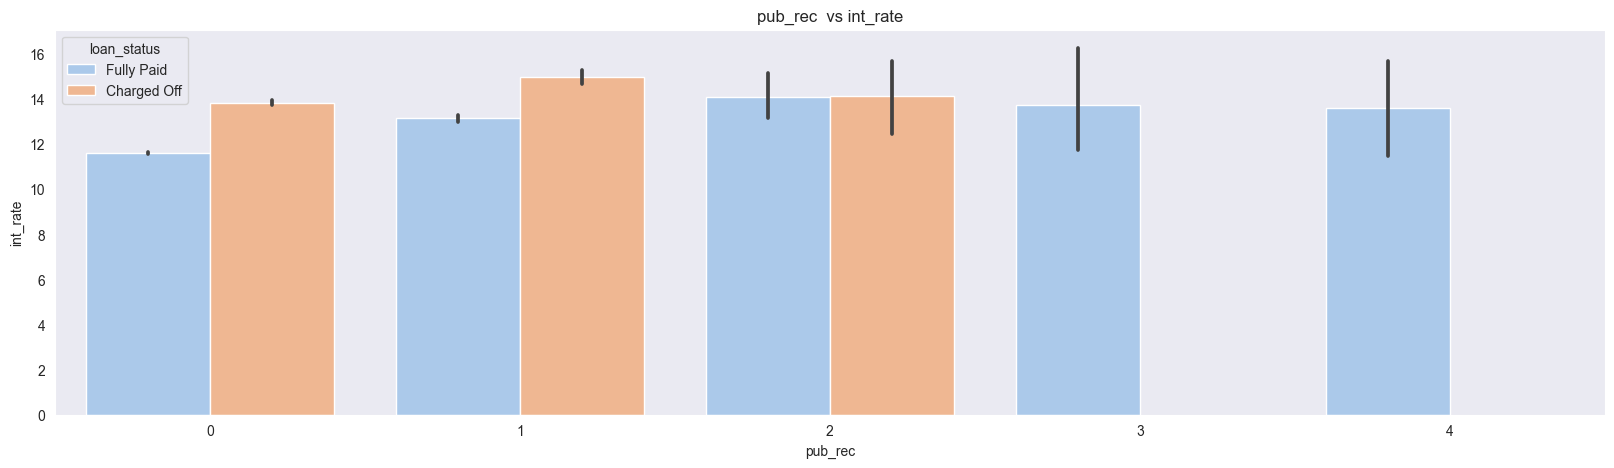

In [112]:
plt.figure(figsize=(20,5))
sns.barplot(x='pub_rec', y='int_rate', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('pub_rec  vs int_rate')
plt.show()

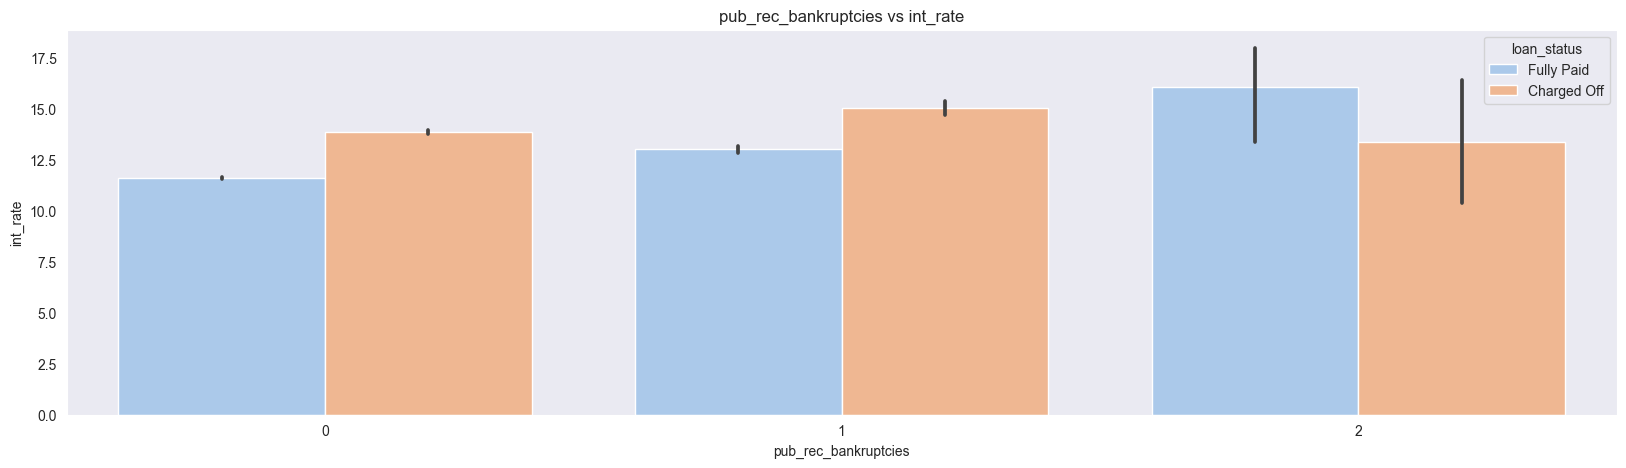

In [113]:
plt.figure(figsize=(20,5))
sns.barplot(x='pub_rec_bankruptcies', y='int_rate', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('pub_rec_bankruptcies vs int_rate')
plt.show()

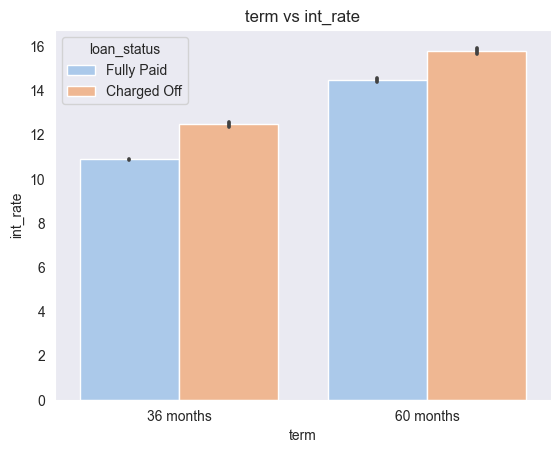

In [114]:
sns.barplot(x='term', y='int_rate', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('term vs int_rate')
plt.show()

### Observations
1) Interest rate is high in housing loan which in turn leading to higher default rate
2) In F and G grade loans, the interest rate is high and the default rate is slightly higher
3) Borrowers from WY state has been imposed with high interest rate leading to higher default rate
4) Default rate is not affected by int_rate on emp_length. Same chance of defaulting
5) Default rate is not affected by int_rate on type of home_ownership. Same chance of defaulting
6) Verified people are paying high rate of interest and defaulting rate is also slightly high
7) Borrowers pay high int_rate in 60 months tenure and has more chance of defaulting

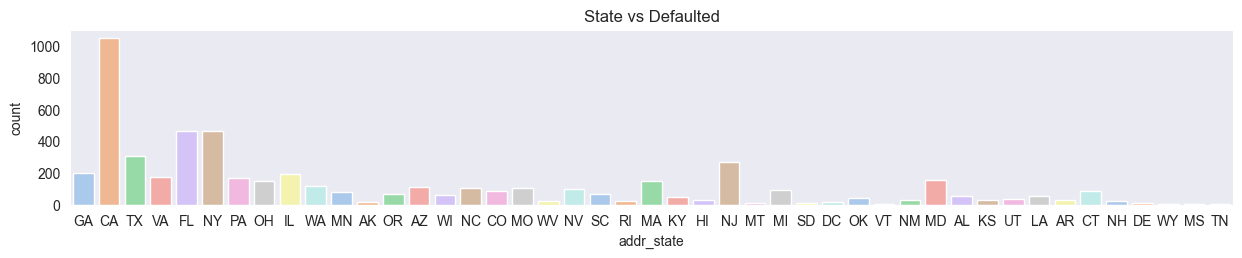

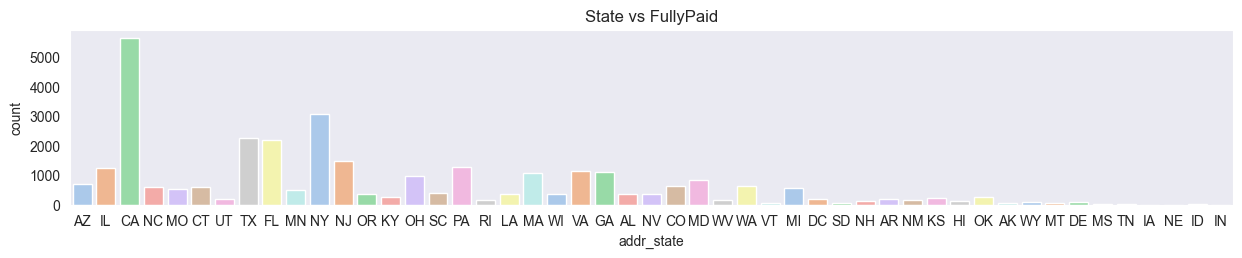

In [115]:
defaulted = refined_loan_data[refined_loan_data['loan_status']=='Charged Off']
plt.figure(figsize=(15,5))
plt.subplot(211)
sns.countplot(x='addr_state', data=defaulted,palette="pastel")
plt.title('State vs Defaulted')

paid = refined_loan_data[refined_loan_data['loan_status']=='Fully Paid']
plt.figure(figsize=(15,5))
plt.subplot(212)
sns.countplot(x='addr_state', data=paid,palette="pastel")
#, order=paid['addr_state'].value_counts().index)
plt.title('State vs FullyPaid')
plt.show()

### Observations
In borrowers from CA,NY,FL default rate is more

## Defaulting wrt dti

### Dividing dti into 5 groups

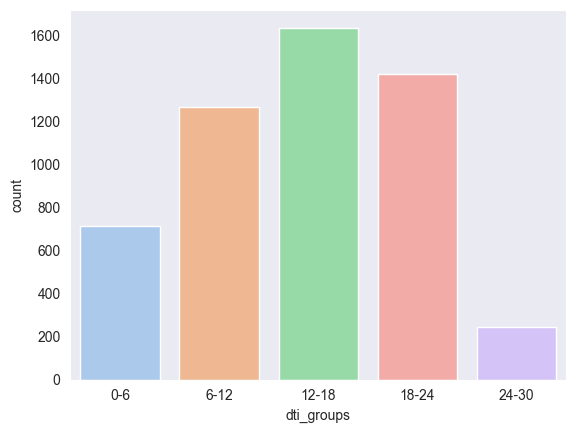

In [116]:
refined_loan_data['dti_groups'] = pd.cut(refined_loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
sns.countplot(x='dti_groups', data=refined_loan_data[refined_loan_data['loan_status']=='Charged Off'],palette="pastel")
plt.show()

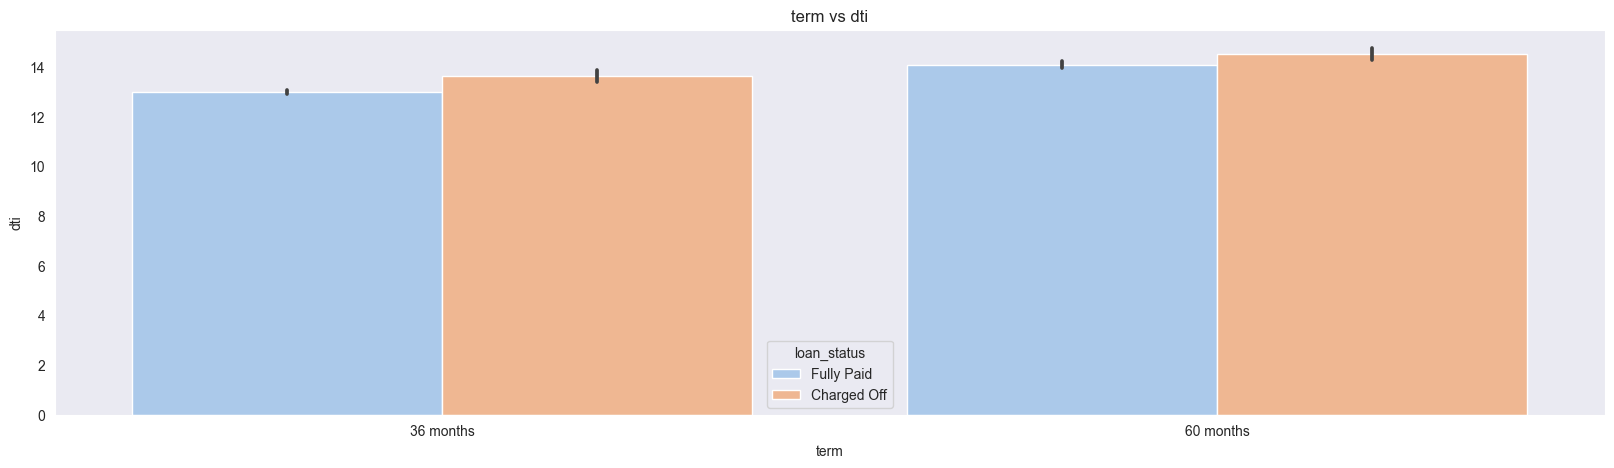

In [117]:
plt.figure(figsize=(20,5))
sns.barplot(x='term', y='dti', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('term vs dti')
plt.show()

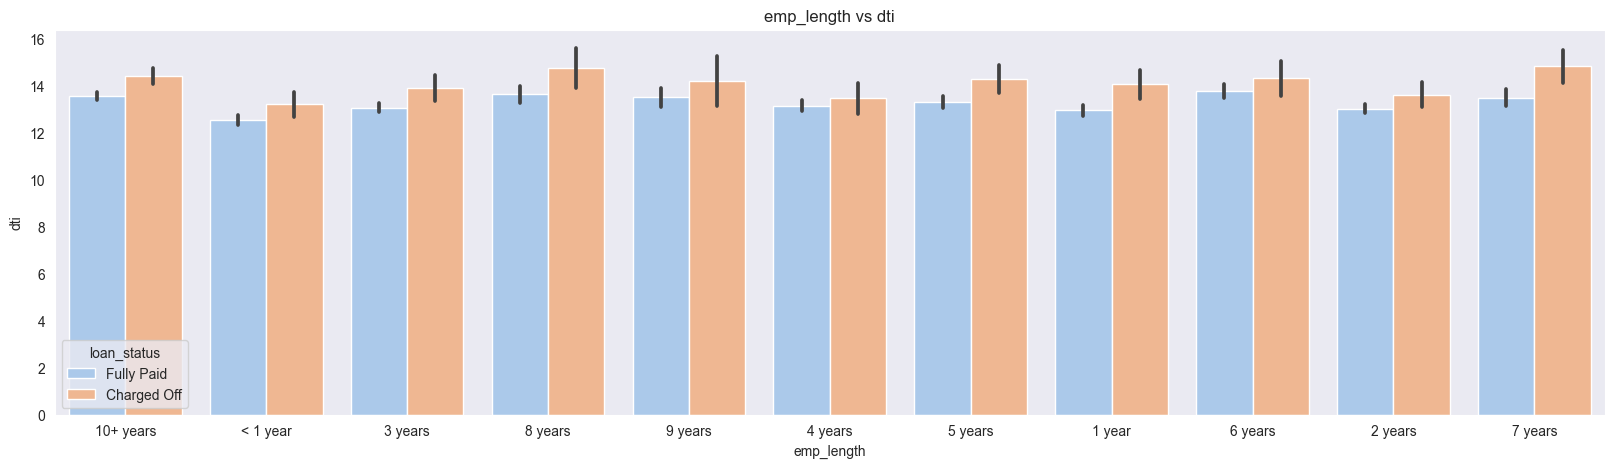

In [118]:
plt.figure(figsize=(20,5))
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('emp_length vs dti')
plt.show()

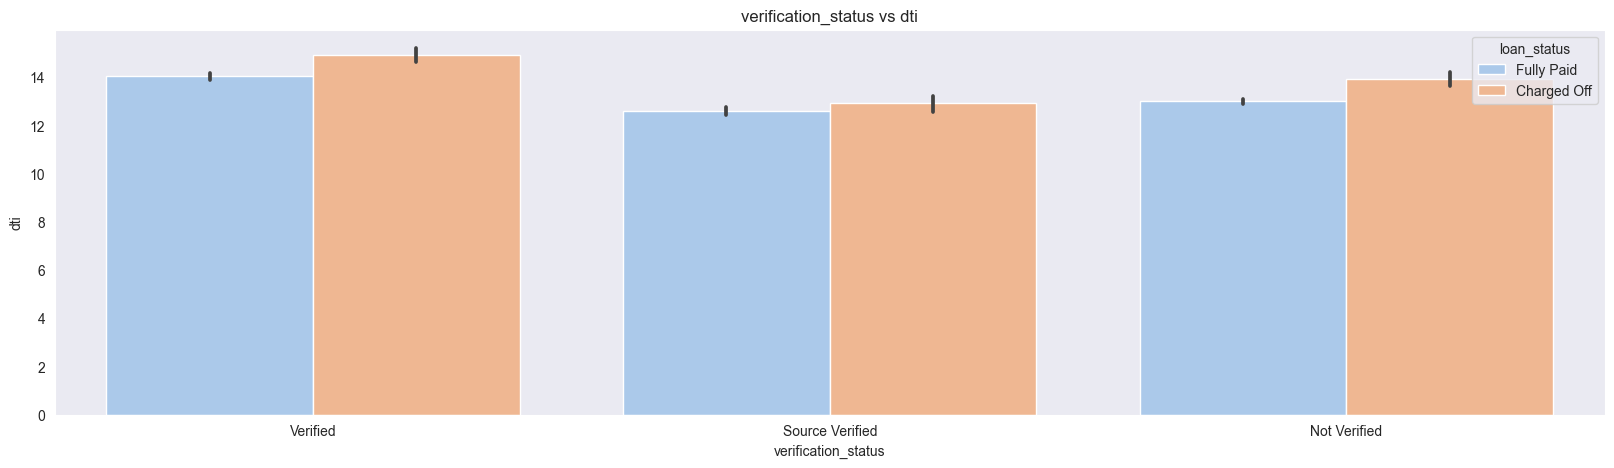

In [119]:
plt.figure(figsize=(20,5))
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=refined_loan_data,palette="pastel")
plt.title('verification_status vs dti')
plt.show()

### Observations
1) More chance of defaulting when Dti is between 12-18

# Conclusions

## Driving factors
1) Grades
2) Pub_rec_bankruptcies
3) int_rate
4) dti

## In order to reduce the credit loss of the lending club, it should follow below suggestions:
1) Lending Club should try to issue balanced number of loans to borrowers from CA, FL and NY
2) Borrowers are more likely to default if they have public derogatory records ,which is also related to their bankruptcy. So club shouldnt issue loans to people with public derogatory records
3) Club should reduce issuing loans for small business, credit card, debt_considation
4) Club should cut down on issuing loans of type F and G or reduce the funding amount
5) Club should issue loans to borrowers from AK state at a slightly lesser interest rates
6) Borrowers with their house in mortage shouldnt be issued loans amounts greater than 12000 and club should also issue balanced number of loans to them
7) Club should reduce issuing higher number of loans of 60 months tenure
8) Club should not issue loan to borrowers with Dti is between 12-18